In [350]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [4]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
#mixtag='angle_cut_15deg_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [5]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [6]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


CPU times: user 5.74 s, sys: 1.33 s, total: 7.06 s
Wall time: 7.38 s


In [7]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    for suffix in "", "_tweak", "_tweak2","_tweak_harut":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [8]:
for dct in dfs_mixed,dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [9]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

2.2 < nu <4.2 2306882  (95.91  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2306882  (100.00  %)
2.2 < nu < 4.2 2306882  (100.00  %)
secondary hadrons are pions 1392583  (60.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 1331857  (95.64  %)
kinematic limits for h2_z 1280597  (96.15  %)
kinematic limits for dphi 1279264  (99.90  %)
kinematic limits for pair_mass 1275717  (99.72  %)
leading hadrons are pions 1275717  (100.00  %)
0.2<h2_p<5.0 1164507  (91.28  %)
0.2<h1_p<5.0 1164507  (100.00  %)

key:  GiBUU_D_tweak_harut
Entries before cut  2348393
Q2>1.0 and Q2<4.0 2347490  (99.96  %)
0.2<h1_p<5.0  2347490  (100.00  %)
inelasticity < 0.85 2347490  (100.00  %)
h1_pid = pions (trigger) 2347490  (100.00  %)
2.2 < nu <4.2 2254015  (96.02  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2254015  (100.00  %)
2.2 < nu < 4.2 2254015  (100.00  %)
secondary hadrons are pions 1328454  (58.94  %)
(h1_pid*h2_pid)<0, opposite charge pions 1282421  (96.53  %)
kine

h1_pid = pions (trigger) 511802  (100.00  %)
2.2 < nu <4.2 490225  (95.78  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 490225  (100.00  %)
2.2 < nu < 4.2 490225  (100.00  %)
secondary hadrons are pions 275663  (56.23  %)
(h1_pid*h2_pid)<0, opposite charge pions 246891  (89.56  %)
kinematic limits for h2_z 230266  (93.27  %)
kinematic limits for dphi 230079  (99.92  %)
kinematic limits for pair_mass 229055  (99.55  %)
leading hadrons are pions 229055  (100.00  %)
0.2<h2_p<5.0 192716  (84.14  %)
0.2<h1_p<5.0 192716  (100.00  %)

key:  GiBUU_Pb_tweak_harut
Entries before cut  500294
Q2>1.0 and Q2<4.0 500049  (99.95  %)
0.2<h1_p<5.0  500049  (100.00  %)
inelasticity < 0.85 500049  (100.00  %)
h1_pid = pions (trigger) 500049  (100.00  %)
2.2 < nu <4.2 479106  (95.81  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 479106  (100.00  %)
2.2 < nu < 4.2 479106  (100.00  %)
secondary hadrons are pions 263490  (55.00  %)
(h1_pid*h2_pid)<0, opposite charge pion

In [10]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
0.2<h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
2.2 < nu <4.2 642836  (98.49  %)
10< h1_th 642836  (100.00  %)
Theta/P fiducial region selected for trigger hadron 642836  (100.00  %)
Nom cuts for the trigger applied 291788  (45.39  %)
 
D_C False
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
0.2<h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
2.2 < nu <4.2 863117  (98.59  %)
10< h1_th 863117  (100.00  %)
Theta/P fiducial region selected for trigger hadron 863117  (100.00  %)
Nom cuts for the trigger applied 405810  (47.02  %)
 
Fe False
Entries before cut  370123
Q2>1.0 and Q2<4.0 370122  (100.00  %)
0.2<h1_p<5.0  370122  (100.00  %)
inelasticity < 0.85 370122  (100.00  %)
h1_pid = pions (trigger) 370122  (100.00  %)
2.2 < nu <4.2 370122  (100.00  %)
10< h1_th

In [11]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mixed.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
    print(f"\n\n{key}")
    if  'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
    dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
    dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
    dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 3403326  (100.00  %)
2.2 < nu < 4.2 3361656  (98.78  %)
secondary hadrons are pions 2449421  (72.86  %)
(h1_pid*h2_pid)<0, opposite charge pions 930584  (37.99  %)
kinematic limits for h2_z 899056  (96.61  %)
kinematic limits for dphi 898616  (99.95  %)
kinematic limits for pair_mass 890515  (99.10  %)
leading hadrons are pions 890515  (100.00  %)
0.2<h2_p<5.0 890515  (100.00  %)
0.2<h1_p<5.0 890515  (100.00  %)
pt>0.07071067811865475 GeV 866977  (97.36  %)
10<h2_th 866977  (100.00  %)
Theta/P fiducial region selected for secondary hadron 816153  (94.14  %)
10< h1_th 816153  (100.00  %)
Theta/P fiducial region selected for trigger hadron 816153  (100.00  %)
Nom cuts for the pair applied (pi pi) 339912  (41.65  %)


C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2509591  (100.00  %)
2.2 < nu < 4.2 2476511  (98.68  %)
secondary hadrons are pions 1581622  (63.86  %)
(h1_pid*h2_pid)<0, opposite charge 

In [12]:
#dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
#dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# Cuts used in PRL

In [13]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [14]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [15]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



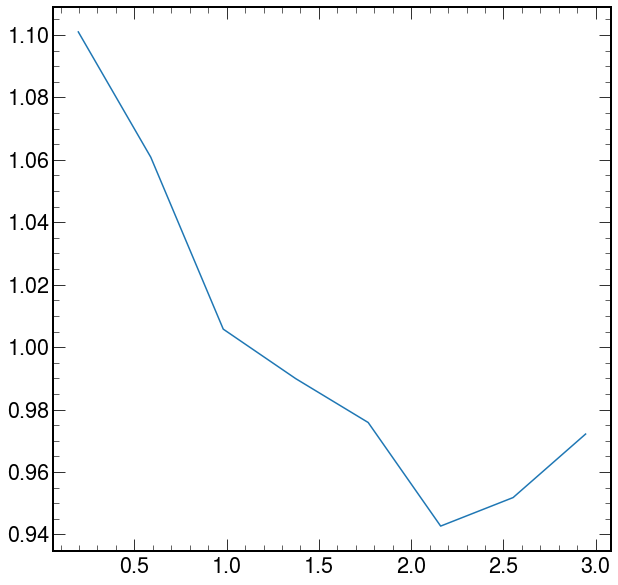

In [16]:
def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    #ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    
    ym=[sum(ym[i*subbins:(i+1)*subbins])+sum(ym[ntotbins-(i+1)*subbins:ntotbins-i*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]
pid=211; pT1min=.25; pT2min=.25; pMin=0.35
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
plt.plot(np.linspace(np.pi/16, 15*np.pi/16, 8), mix_corr_alt(dfs_pair["D"].query(q)))

In [185]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, GiBUU_suffix="",
              addCuts=None, addCutsTrig=None, divideByMix=False):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
        else:
            Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            if usePRLcuts:
                q = "h2_z>0.05 and h1_z>0.5"
            N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom

            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            M = N2mix/(sum(N2mix)/len(N2mix))
            dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)
            if divideByMix:
                C = S/M
                dCstat = dSstat/M
            else :
                C=S
                dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, M=M, dSstat=dSstat, dMstat=dMstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, M_alt=M_alt))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            integral_GiBUU_D = 0
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):
            
                nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+GiBUU_suffix].query(q)['dphi'], bins=bins)

                x = (x[1:]+x[:-1])/2
                dx =x[1]-x[0]

                qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                N1 = len(dfs_trigger["GiBUU_"+A+GiBUU_suffix].query(qtrig))
                y = N2/N1/dx/2
                #print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2

                y/=integral_GiBUU_D

                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D

                tmp = A + "_fine" if useFinerBinning else A
                GiBUU[k][tmp] = pd.DataFrame(dict(C=y, R=y/GiBUU_D,
                                                phi=x, 
                                                 phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [424]:
from scipy.interpolate import make_interp_spline
def make_plots_new(data, GiBUU, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None,
                  slice_unit=None):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "SMCR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        axs["S"] = [ax[k][0] for k in range(len(ax))]
        axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CRSM":    
            if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
                axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[1]-x[0])*(i-1.5)
            
            S = data[k][A].S
            M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            dSstat = data[k][A].dSstat
            dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)

            axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
        Alist = enumerate("D C Fe Pb".split())
        #granulatir
        for i, A in Alist:
            #y = GiBUU[k][A+"_fine"].C
            y=GiBUU[k][A].C
            arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])

            
            #x= GiBUU[k][A+"_fine"].phi
            x=GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            
            X_Y_Spline = make_interp_spline(x, y)
            
            # Returns evenly spaced numbers
            # over a specified interval.
            X_ = np.linspace(x.min(), x.max(), 500)
            Y_ = X_Y_Spline(X_)
            
            X_=[0] + list(X_)+[2*np.pi]
            Y_=[Y_[0]] + list(Y_)+[Y_[0]]
            
            artists.append(axs['C'][k].plot(X_, Y_, **arg, label=f"GiBUU {A}")[0])
            
            
            x= GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            R_GiBUU = GiBUU[k][A].R
            
            if A!="D":
                axs['R'][k].plot(x, list(R_GiBUU)+list(reversed(R_GiBUU)), **arg, label=f"GiBUU {A}")

            if (max(C)>maxC):
                maxC=max(C)
            if max(y)>maxC:
                maxC = max(y)
            if max(R_data)>maxR:
                maxR = max(R_data)
            if max(R_GiBUU)>maxR:
                maxR = max(R_GiBUU)

            axs["C"][k].set_ylim(0, maxC*(1.1 if len(sliceinfo) == 1 else 1.4))
            axs["R"][k].set_ylim(0, 1.3*maxR)
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.42, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            if len(sliceinfo)!=1 and key in "SM":    
                axs[key][k].text(0.5,0.9,
                               sliceinfo[k],
                              transform=axs[key][k].transAxes,
                                 horizontalalignment='center',
                                 fontsize=fontsize)
            elif len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k] + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                elif key == "S": 
                    #a=[artists[i] for i in [0,2,4,6]]
                    a=[artists[i] for i in [0,1,2,3]]
                    l=[aa.get_label() for aa in a]
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ax in axs['R']:
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
    for key in "CR SM".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    for d in ("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/",
                "/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/"):
        figs["CR"].tight_layout()
        figs["CR"].savefig(f"{d}/corr_{filename_tag}.pdf")

In [425]:
import copy
def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    
    newIntegral =2*dx*sum(yDcorr)
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    return data_corr

In [426]:
import pickle

with open('syst_from_misid.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_misid = pickle.load(f)
def add_syst_error_from_misid(data, key):
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A]['dCsyst_pid']=syst_from_misid[key][i]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_pid'])

In [427]:
def add_syst_error_from_coulomb(data, key):
    if "pT" not in key:
        return
    syst_from_coulomb={"C":0.014, "Fe": 0.030, "Pb": 0.081}
    for i in range(len(data)):
        for A in "C Fe Pb".split():
            data[i][A]['dCsyst_coul']=syst_from_coulomb[A]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_coul'])

In [428]:
import pickle

with open('syst_from_cuts.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_cuts = pickle.load(f)
def add_syst_error_from_cuts(data, key):
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A]['dCsyst_cuts']=syst_from_cuts[key][i].tot*data[i][A].C

            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_cuts'])

In [429]:
#add a 6 percent systematic error to all bins
def add_syst_from_mixing(data):
    for j in range(len(data)):
        for A in "D C Fe Pb".split():
            df = data[j][A]
            add_syst=.06
            df['dCsyst_mix']=add_syst*df.C
            df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [430]:
#old version

# def add_syst_from_mixing(data):
#     for j in range(len(data)):
#         for A in "D C Fe Pb".split():
#             df = data[j][A]
#             add_syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
#             df['dCsyst_mix']=add_syst*df.C
#             df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [431]:
all_data_uncorr={}
all_data={}
all_GiBUU={}
all_sliceinfo={}
GiBUU_suffix="_tweak_harut"
#GiBUU_suffix="_tweak"

1.0
1.0


<ipython-input-424-d172ee8d7e40>:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


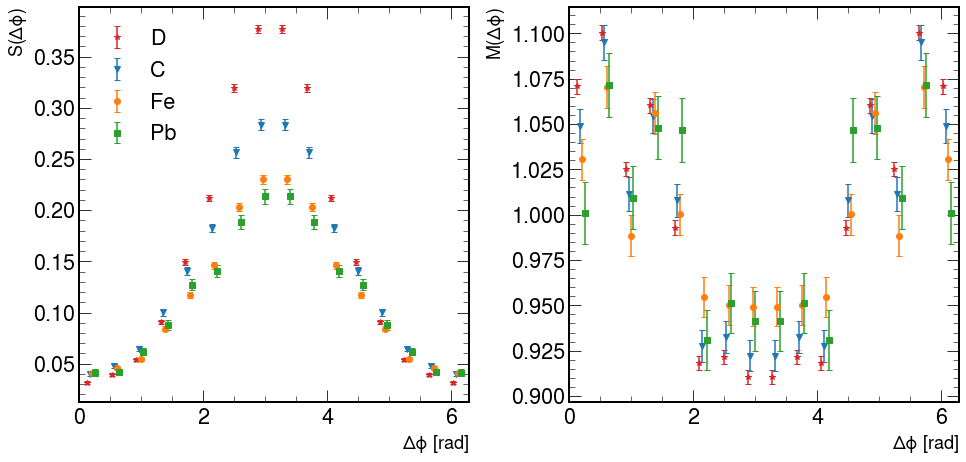

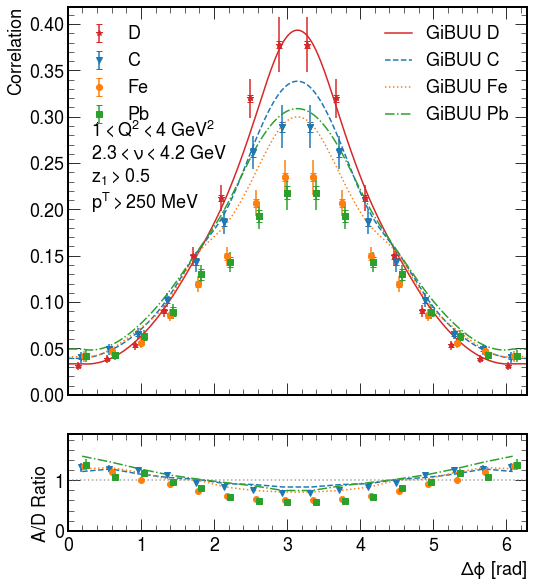

In [432]:
data, GiBUU, sliceinfo = get_values(None,  pThetaCutsGiBUU=True,GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'all')
add_syst_error_from_cuts(data_corr, 'all')
add_syst_error_from_coulomb(data_corr, 'all')
add_syst_from_mixing(data_corr)
all_data_uncorr['all']=data
all_data['all']=data_corr
all_GiBUU['all']=GiBUU
print(sum(all_GiBUU['all'][0]['D_fine'].C)*2*np.pi/16)
print(sum(all_data['all'][0]['D'].C)*2*np.pi/8)

#replace the D calculations with the tweaked
#GiBUU[0]['D']=GiBUU[0]['D_tweak']
all_sliceinfo['all'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag="all")

0    0.107263
1    0.140217
2    0.128266
3    0.057322
4    0.056630
5    0.020566
6    0.024818
7    0.045413
dtype: float64


<ipython-input-424-d172ee8d7e40>:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


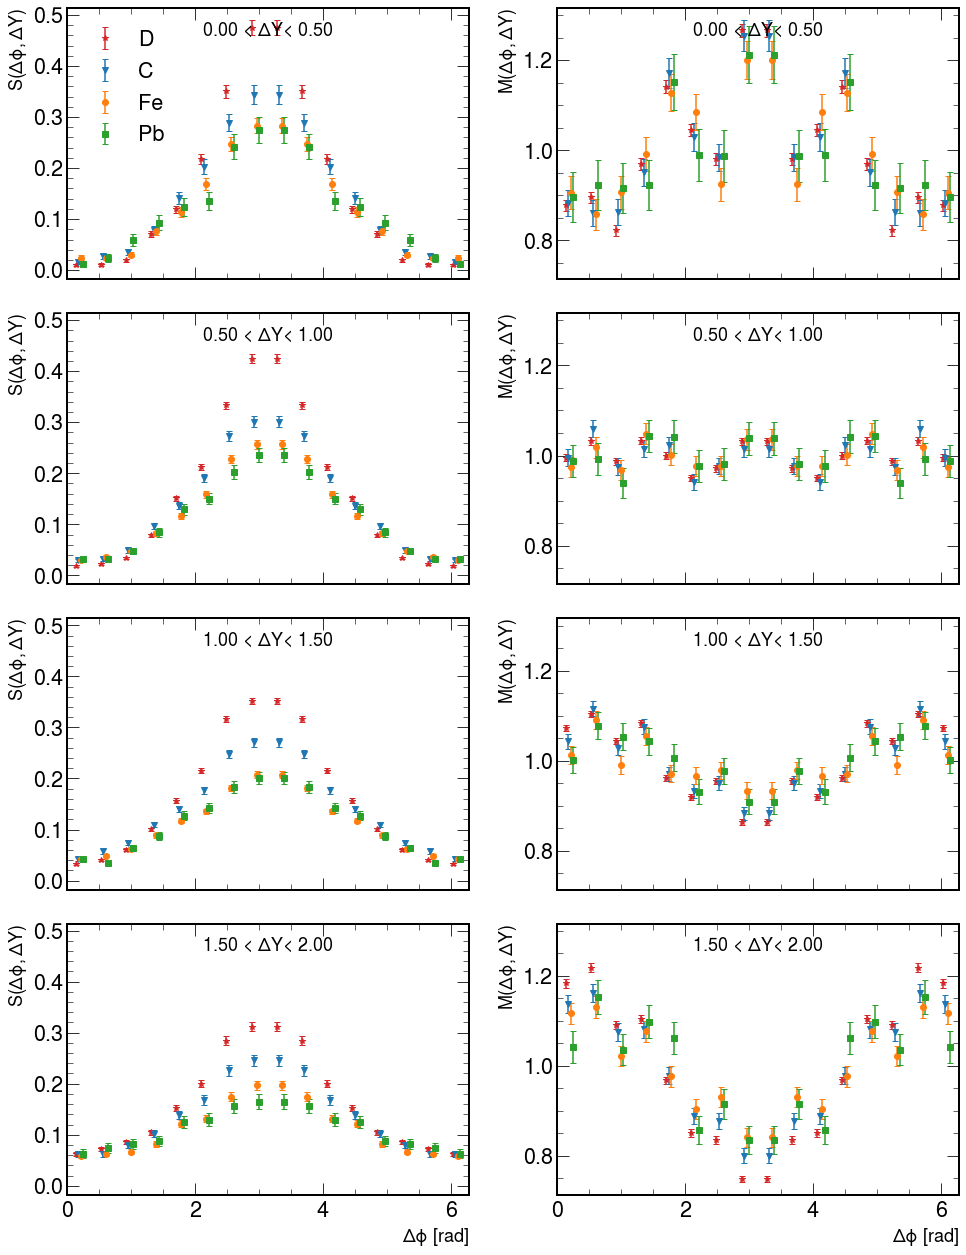

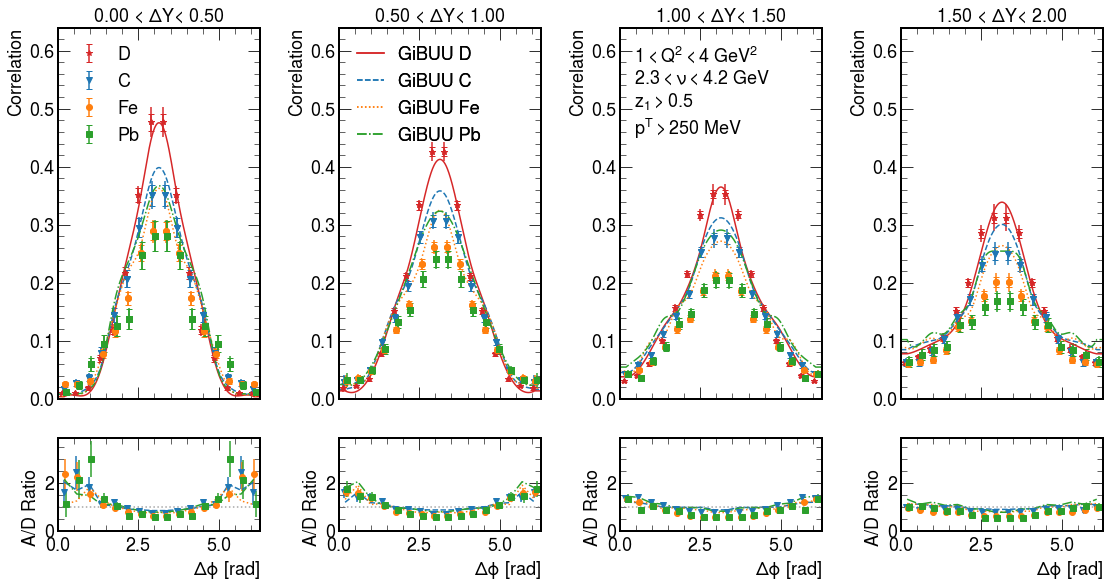

In [433]:
data, GiBUU, sliceinfo = get_values("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0),GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'dY')
add_syst_error_from_cuts(data_corr, 'dY')
add_syst_error_from_coulomb(data_corr, 'dY')
all_data_uncorr['dY']=data
all_data['dY']=data_corr
all_GiBUU['dY']=GiBUU
all_sliceinfo['dY'] = sliceinfo

print(data_corr[0]['D'].dCsyst/data_corr[0]['D'].C)
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='dY')

<ipython-input-424-d172ee8d7e40>:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


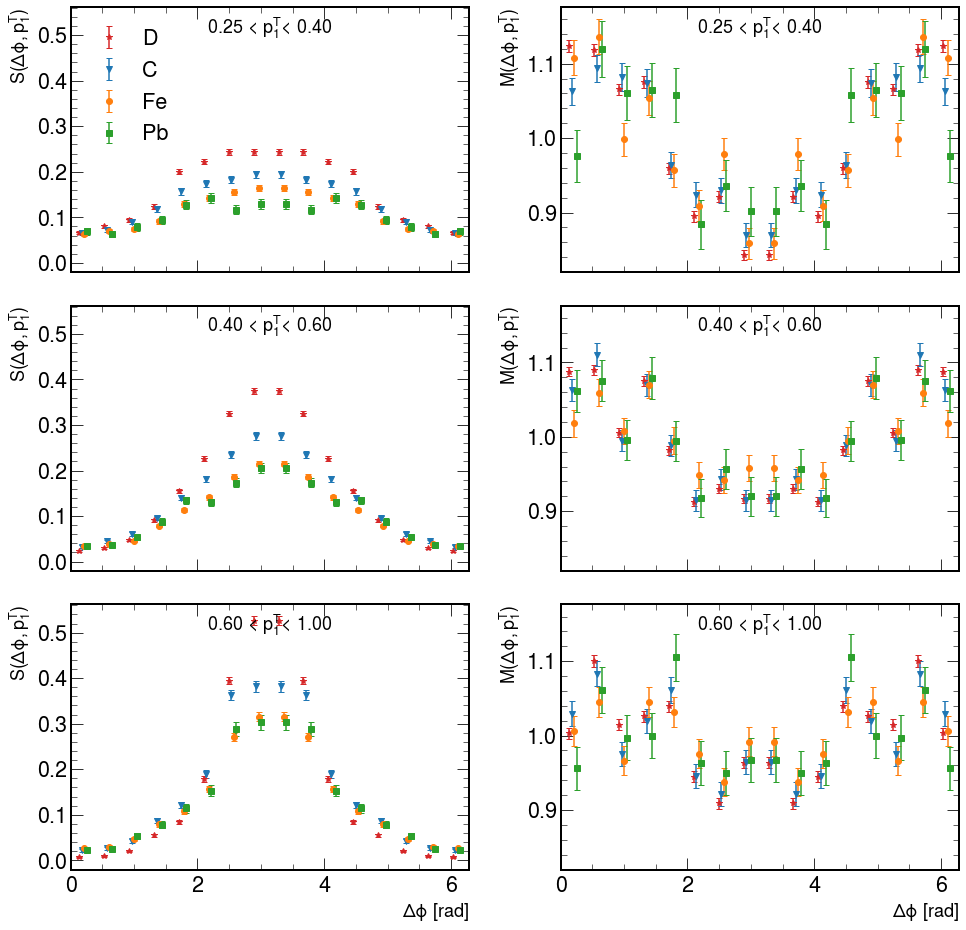

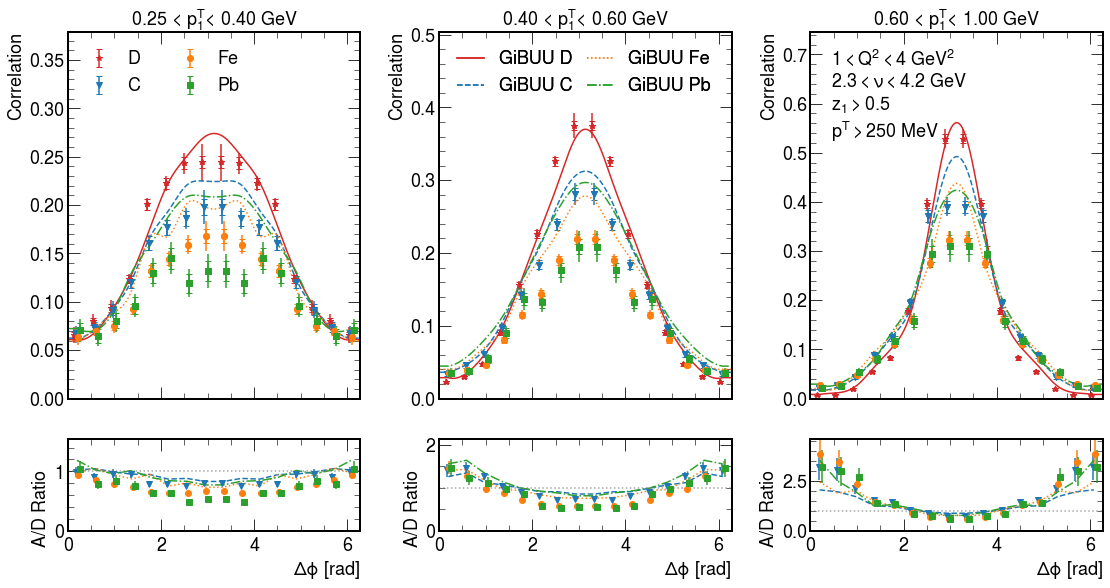

In [434]:
data, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),
                                    GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT1')
add_syst_error_from_cuts(data_corr, 'pT1')
add_syst_error_from_coulomb(data_corr, 'pT1')
all_data_uncorr['pT1']=data
all_data['pT1']=data_corr
all_GiBUU['pT1']=GiBUU
all_sliceinfo['pT1'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT1', slice_unit="GeV")

<ipython-input-424-d172ee8d7e40>:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs[key].show()


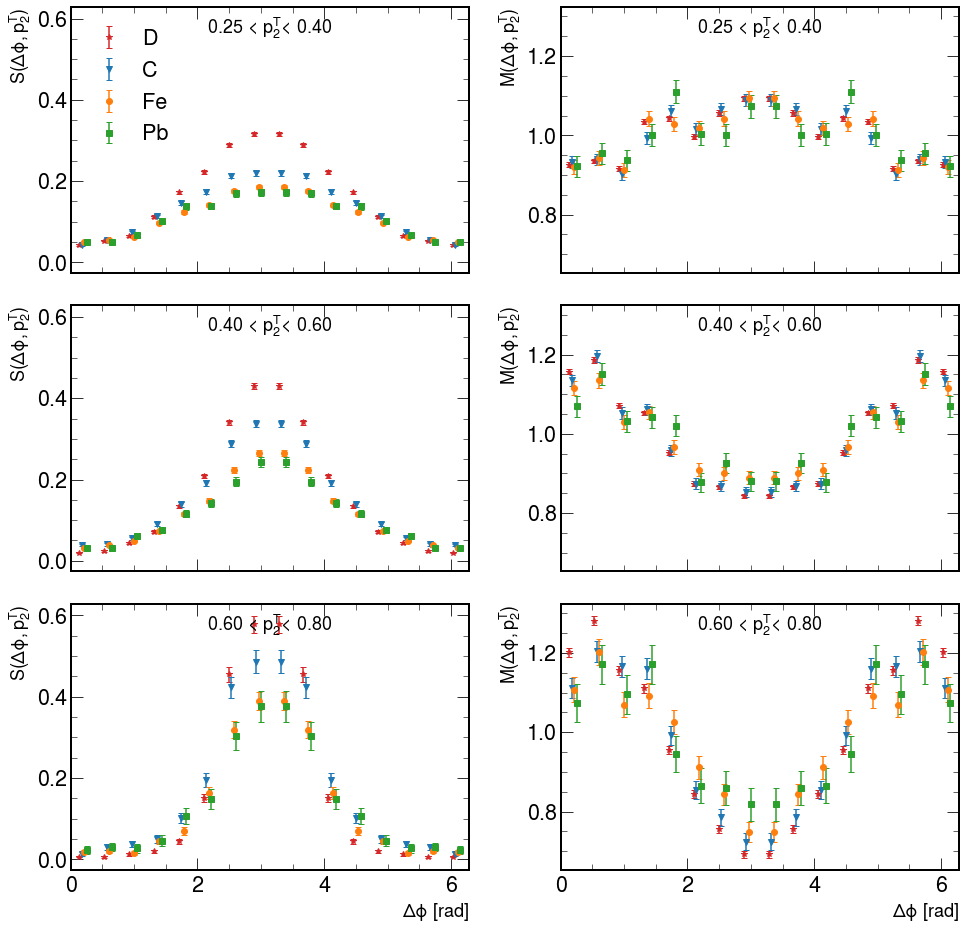

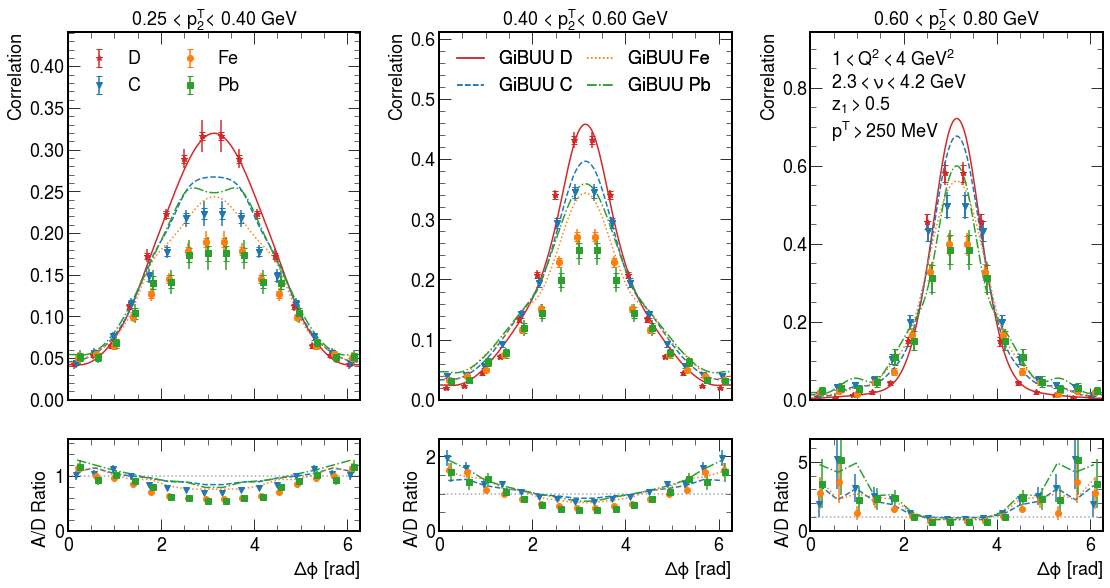

In [435]:
data, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),
                                    GiBUU_suffix=GiBUU_suffix)
data_corr = [apply_endcap_corrections(d) for d in data]
add_syst_error_from_misid(data_corr, 'pT2')
add_syst_error_from_cuts(data_corr, 'pT2')
add_syst_error_from_coulomb(data_corr, 'pT2')
all_data_uncorr['pT2']=data
all_data['pT2']=data_corr
all_GiBUU['pT2']=GiBUU
all_sliceinfo['pT2'] = sliceinfo
make_plots_new(data_corr, GiBUU, sliceinfo, filename_tag='pT2', slice_unit='GeV')

In [414]:
#_, all_GiBUU['dY_fine'], all_sliceinfo['dY_fine'] = get_values("drap", "\Delta Y", (0,.25, 0.5,0.75, 1,1.25, 1.5,1.75, 2.0))
#_, all_GiBUU['pT1_fine'], all_sliceinfo['pT1_fine'] = get_values("h1_cm_pt", "p^T_{1}", (0.25,0.3, 0.4,0.5, 0.6,.8, 1))
#_, all_GiBUU['pT2_fine'], all_sliceinfo['pT2_fine'] = get_values("h2_cm_pt", "p^T_{2}", (0.25,0.3, 0.4,.5,0.6,.7, 0.8))

In [358]:
with open('syst_from_cuts_widths.pkl', 'rb') as f:
    syst_from_cuts_widths = pickle.load(f)
with open('syst_from_cuts_broadenings.pkl', 'rb') as f:
    syst_from_cuts_broadenings = pickle.load(f)

chi2= 10.475787361560197    ndof= 9 0.6866431692264736
chi2= 19.307968906313246    ndof= 6 0.9963260662238809
chi2= 2.4958409390516683    ndof= 6 0.13106716001085242


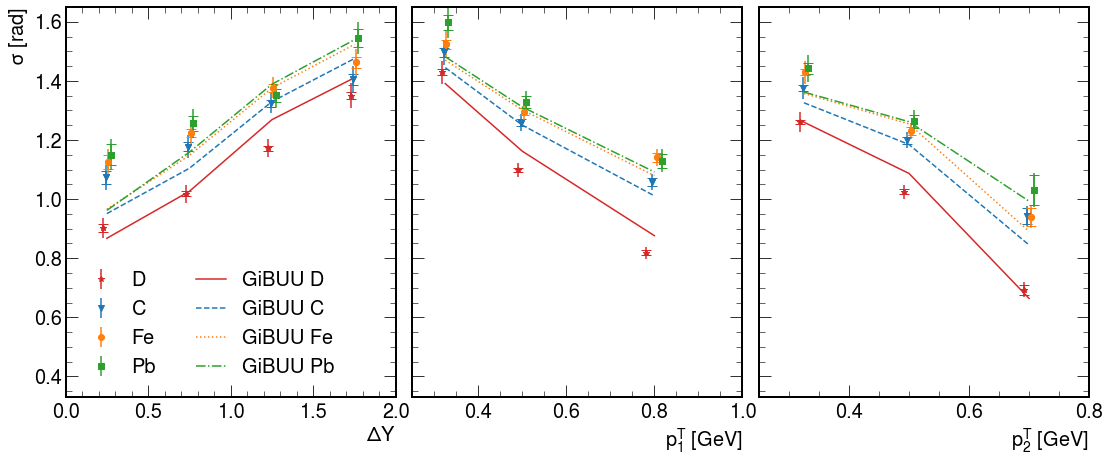

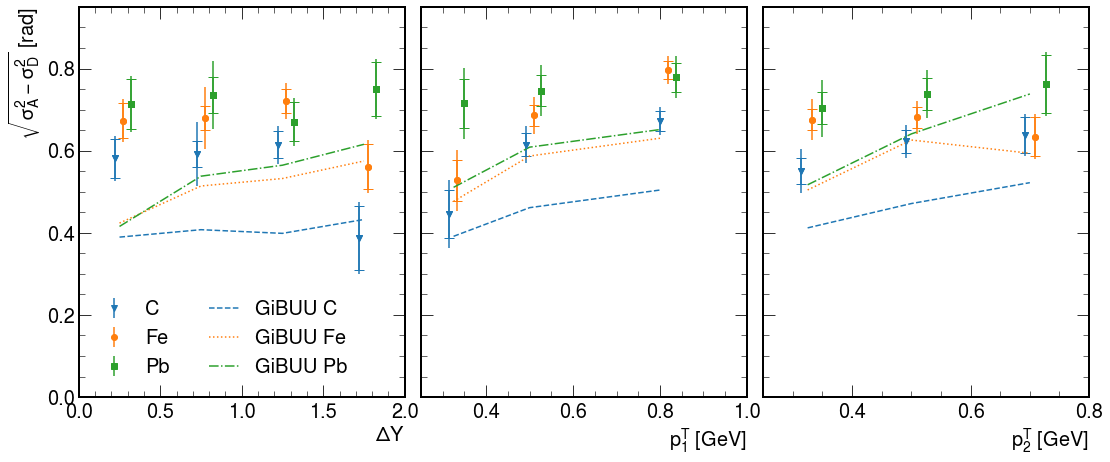

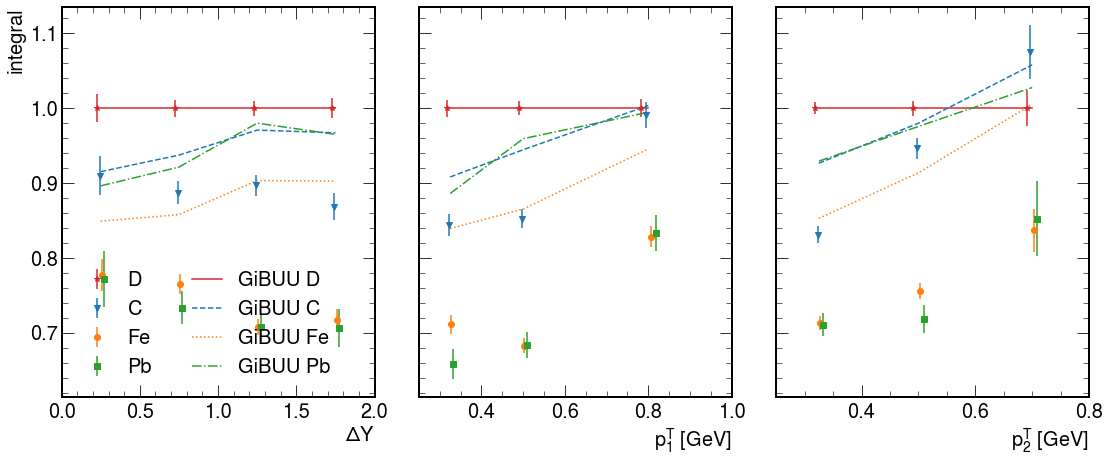

chi2= 32.27959720692512    ndof=21 0.9451588838521442
max deviation for D: 0.08231633645499221
max deviation for D: 0.07159150919141179
max deviation for D: 0.06078113357502404
RMS devs: 0.023450548237456566


In [369]:
from scipy.stats import chi2

chi2tot=0

figs = {}
axs = {}

fontsize=20
data_widths={}
GiBUU_widths={}

data_broadenings={}
GiBUU_broadenings={}

syst_widths_eff_factor=0.012

dphi_res=.02 # from single-pion note

sys_from_resolution = lambda width : width-np.sqrt(width**2-dphi_res**2)
#approximate systematic error due to the finite binwidth
sys_from_finite_binwidth = lambda width : abs(1.8 -width)*.01

sys_tot_width= lambda width: np.hypot(sys_from_resolution(width), sys_from_finite_binwidth(width))

statkeys = 'widths', 'diffwidths','integrals'
for key in statkeys:
    fig, ax= plt.subplots(1,3, figsize=(16, 7), sharey='all')
    figs[key] = fig; axs[key] = ax 
    
    
titles = ["leading $\\pi^+$, sublead. $\\pi^-$", "leading $\\pi^-$, sublead. $\\pi^+$"]
    
varkeys='dY pT1 pT2'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

for i in range(3):
    key = varkeys[i]
    xlim = float(all_sliceinfo[key][0].split("<")[0]),\
           float(all_sliceinfo[key][len(all_sliceinfo[key])-1].split("<")[2])
    
    for a in axs.values():
        a[i].set_xlim(xlim)
    
    
    #if i == 0:
    #    plt.title(titles[j])
    axs['integrals'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
    axs['widths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)
    axs['diffwidths'][i].set_xlabel(f'${vartex[i]}$ {units[i]}', fontsize=fontsize)

    for k in range(4):
        A = "D C Fe Pb".split()[k]
        widths=[]
        dwidths_stat=[]
        dwidths_tot = []
        dwidths_cuts = []
        dwidths_eff = []
        integrals=[]
        dintegrals=[]
        xs=[]
        for l in range(len(all_data[key])):
            df = all_data[key][l][A]

            y = df.C
            dystat = df.dCstat
            # do not include the systematics from cuts for the correlation funcs  
            # instead these will be added in later
            dytot= np.sqrt(df.dCstat**2+df.dCsyst**2-df.dCsyst_cuts**2)
            phi=df.phi
            #print(y, dy, phi)
            binwidth=(-phi[:-1]+phi[1:])
            #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
            width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
            widths.append(width)
            sum_y = np.sum(y)
            #sum_dy2=np.sum(dy**2)
            dwidth_stat=np.sqrt(sum(dystat**2*(((phi-np.pi)**2-width**2)/sum_y)**2))/(2*width)
            dwidths_stat.append(dwidth_stat)

            dwidth_cuts = width*syst_from_cuts_widths[key][l]["tot"]
            
            dwidth_eff = np.sqrt(width)*syst_widths_eff_factor
            dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
                                + sys_tot_width(width)**2+dwidth_cuts**2+dwidth_eff**2)

            dwidths_cuts.append(dwidth_cuts)
            dwidths_eff.append(dwidth_eff)
            dwidths_tot.append(dwidth_tot)

            binwidth=phi[1]-phi[0]
            integrals.append(sum(y)*binwidth*2)
            dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

            r= all_sliceinfo[key][l].split('<')
            r = float(r[0]), float(r[2])
            shift = (r[1]-r[0])*(k-1.5)*.03
            xs.append((r[0]+r[1])/2+shift)

        #print(widths)


        a=axs['widths'][i].errorbar(xs, widths, dwidths_stat, color=colors[k], marker=markers[k],
                    linestyle='', label =A, capsize=5)
        a=axs['widths'][i].errorbar(xs, widths, dwidths_tot, color=colors[k], marker=markers[k],
                    linestyle='', label =None, capsize=0)
        if i == 0:
            artists.append(a)
            labels.append(A)
        axs['integrals'][i].errorbar(xs, integrals, dintegrals, color=colors[k], marker=markers[k],
                    linestyle='', label =A)

        data_widths[A, key] = pd.DataFrame({"xs":xs, "width":widths, "dwidths_stat": dwidths_stat,
                              "dwidths_tot": dwidths_tot, "dwidths_cuts":dwidths_cuts,
                                           "dwidths_eff": dwidths_eff})

        #same for GiBUU:
        widths=[]
        xs_GiBUU=[]
        integrals=[]
        #suffix="_fine"
        suffix=""
        for l in range(len(all_GiBUU[key+suffix])):

            df=all_GiBUU[key+suffix][l][A]
            y = df.C
            phi=df.phi
            binwidth=(-phi[:-1]+phi[1:])
            width=np.sqrt(sum(y*(phi-np.pi)**2)/sum(y))
            widths.append(width)

            binwidth=phi[1]-phi[0]
            integrals.append(sum(y)*binwidth*2)
            #dintegrals.append(np.sqrt(sum(dystat**2))*binwidth*2)

            r= all_sliceinfo[key+suffix][l].split('<')
            r = float(r[0]), float(r[2])
            xs_GiBUU.append((r[0]+r[1])/2)
        a=axs['widths'][i].plot(xs_GiBUU, widths, color=colors[k],
                    linestyle=linestyles[k], label ="GiBUU "+A)

        GiBUU_widths[A, key] = pd.DataFrame({"xs": xs, "width":widths})
        if i == 0:
            artists.append(a[0])
            labels.append("GiBUU "+A)
        axs['integrals'][i].plot(xs_GiBUU, integrals, color=colors[k],
                    linestyle=linestyles[k], label ="GiBUU_"+A)
    chi2_for_key=0
    
    #bs=[]
    #dbstats=[]
    #dbsysts=[]
    for k in range(1,4):
        A = "D C Fe Pb".split()[k]
        xs_shift = np.add(xs, (xs[1]-xs[0])*.1*(k-2))
        #axs['diffwidths'][i].plot(xs, np.subtract(GiBUU_widths[A,key]['widths'],GiBUU_widths["D",key]['widths']), color=colors[k],
        #            linestyle=linestyles[k])
        #axs['diffwidths'][i].errorbar(xs_shift, np.subtract(data_widths[A,key]['widths'],data_widths["D",key]['widths']), 
        #                              np.hypot(data_widths[A,key]['dwidths'],data_widths["D",key]['dwidths']), color=colors[k], marker=markers[k],
        #            linestyle='', label =A, capsize=5)

        g_A=pd.Series(GiBUU_widths[A,key]["width"])
        g_D=pd.Series(GiBUU_widths["D",key]["width"])
        axs['diffwidths'][i].plot(xs_GiBUU, np.sqrt(g_A**2-g_D**2), color=colors[k],
                    linestyle=linestyles[k])

        d_A = pd.Series(data_widths[A,key]['width'])
        d_D = pd.Series(data_widths["D",key]['width'])

        ds_A = pd.Series(data_widths[A,key]['dwidths_stat'])
        ds_D = pd.Series(data_widths["D",key]['dwidths_stat'])

        y = np.sqrt(d_A**2-d_D**2)
        dbstat=np.hypot(d_A*ds_A,d_D*ds_D)/y
        axs['diffwidths'][i].errorbar(xs_shift, y, 
                                      dbstat, color=colors[k], marker=markers[k],
                    linestyle='', label =A, capsize=5)
        ds_A = data_widths[A,key].eval('sqrt(dwidths_tot**2-dwidths_cuts**2-dwidths_eff**2)')
        ds_D = data_widths["D",key].eval('sqrt(dwidths_tot**2-dwidths_cuts**2-dwidths_eff**2)')
        
        syst_from_eff_broadening_factor=0.015
        dy= np.sqrt((np.hypot(d_A*ds_A,d_D*ds_D)/y)**2+\
                    (y*syst_from_cuts_broadenings[key][l]["tot"])**2\
                   +(syst_from_eff_broadening_factor*y)**2)
        
        dbsyst=np.sqrt(dy**2-dbstat**2)
        yavg=sum(y/dy**2)/sum(1/dy**2)
        chi2tot+=sum((y-yavg)**2/dy**2)
        chi2_for_key+=sum((y-yavg)**2/dy**2)
        axs['diffwidths'][i].errorbar(xs_shift, y, 
                                      dy, color=colors[k], marker=markers[k],
                            linestyle='', label =None, capsize=0)
        
        
        
        
        axs['diffwidths'][i].set_ylim(0, 0.95)
        data_broadenings[A,key]=pd.DataFrame(dict(b=y, dbstat=dbstat, dbsyst=dbsyst))
    print("chi2=", chi2_for_key,"   ndof=", 3*(len(y)-1), chi2.cdf(chi2_for_key,3*(len(y)-1)))
axs['widths'][0].set_ylabel("$\sigma$ [rad]", fontsize=fontsize)
axs['diffwidths'][0].set_ylabel("$\\sqrt{\\sigma^2_A-\\sigma^2_D}$ [rad]", fontsize=fontsize)
axs['integrals'][0].set_ylabel("integral", fontsize=fontsize)

for axlist in axs['widths'], axs['diffwidths'], axs['integrals']:
    for ax in axlist:
        ax.tick_params(axis='both', labelsize=fontsize)

indices = [0,2,4, 6, 1,3, 5,7]
axs['widths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)

axs['widths'][0].set_ylim(0.33, 1.65)
axs['integrals'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)
indices = [2,4, 6, 3, 5,7]
axs['diffwidths'][0].legend([artists[i] for i in indices], 
                        [labels[i] for i in indices], ncol=2, framealpha=0, fontsize=fontsize)


figs['widths'].tight_layout()
figs['widths'].subplots_adjust(wspace=0.05)
figs['diffwidths'].tight_layout()
figs['diffwidths'].subplots_adjust(wspace=0.05)
figs['integrals'].tight_layout()
for plotdir in '/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/',"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/":
    figs['widths'].savefig(plotdir+"/widths.pdf")
    figs['diffwidths'].savefig(plotdir+"/diffwidths.pdf")

plt.show()
print("chi2=", chi2tot,"   ndof=21", chi2.cdf(chi2tot,21))

sumDev2=0
n=0
for key in "dY pT1 pT2".split():
    devs = (data_widths["D",key].width-GiBUU_widths["D", key].width)/data_widths["D", key].width
    sumDev2=sum(devs**2)
    n+=len(data_widths["D",key].width)
    print("max deviation for D:", np.max(np.abs(devs)))
print("RMS devs:", np.sqrt(sumDev2/n))

In [360]:
1-0.9869990438349697**3

0.03849799139628707

In [361]:
print(syst_from_cuts_widths[key][l])

{'p2_gt_370': 0.0, 'pt_gt_27': -0.011814609682938015, 'vtx_dZ_lt_2pt7': -0.004248762233156095, 'CC_thresh_2pt5': 0.0009700410844255269, 'tot': 0.012592774205056634}


[0.01435415 0.01287688 0.01554405] 0.013596929358153424


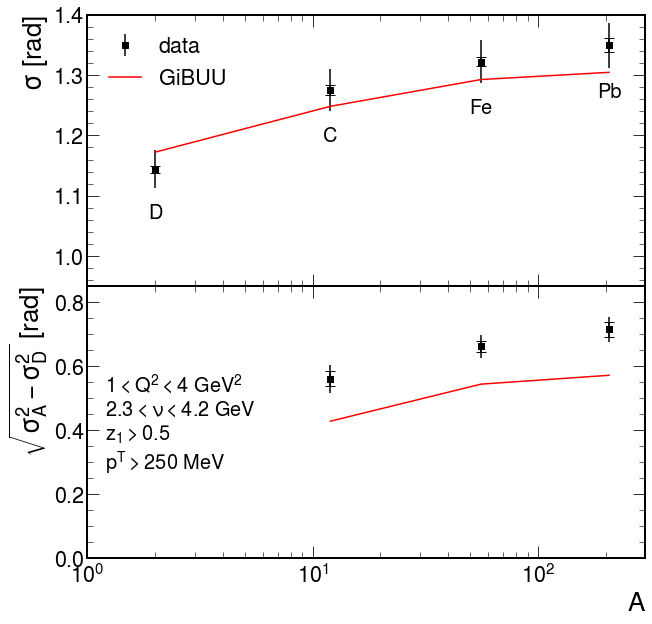

In [362]:
fig, axs=plt.subplots(2,1, sharex='all')

fontsize=20
#data_widths={}
#GiBUU_widths={}

dphi_res=.02 # from single-pion note

syst_widths_eff_factor=0.012

sys_from_resolution = lambda width : width-np.sqrt(width**2-dphi_res**2)
#approximate systematic error due to the finite binwidth
sys_from_finite_binwidth = lambda width : abs(1.8 -width)*.01

sys_tot_width= lambda width: np.hypot(sys_from_resolution(width), sys_from_finite_binwidth(width))


varkeys='all'.split()
vartex='\Delta Y', 'p^T_1', 'p^T_2'
units = '', '[GeV]', '[GeV]'

linestyles='- -- : -.'.split()
colors='tab:red tab:blue tab:orange tab:green'.split()
markers='*vos'

artists, labels=[],[]

key = 'all'

As=[2,12, 56, 207]
widths=[]
dwidths_stat=[]
dwidths_tot = []
dwidths_cuts=[]

widths_GiBUU=[]
for k in range(4):

    A = "D C Fe Pb".split()[k]
    xs=[]
    l=0 #there is only one slice
    df = all_data[key][l][A]
    y = df.C
    dystat = df.dCstat
    dytot=df.eval("sqrt(dCstat**2+dCsyst**2-dCsyst_cuts**2-dCsyst_mix**2)")
    phi=df.phi
    #print(y, dy, phi)
    binwidth=(-phi[:-1]+phi[1:])
    #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
    width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
    widths.append(width)
    #sum_dy2=np.sum(dy**2)
    dwidth_stat=np.sqrt(sum(dystat**2*(((phi-np.pi)**2-width**2)/sum_y)**2))/(2*width)
    dwidths_stat.append(dwidth_stat)

    #dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
    #                    + sys_tot_width(width)**2-)
    dwidth_cuts = width*syst_from_cuts_widths[key][l]["tot"]
    dwidth_eff = np.sqrt(width)*syst_widths_eff_factor
    dwidth_tot=np.sqrt(sum(dytot**2*(((phi-np.pi)**2-width**2)/sum_y)**2)/(4*width**2)\
                        + sys_tot_width(width)**2+dwidth_cuts**2+dwidth_eff**2)
    
    dwidths_tot.append(dwidth_tot)
    dwidths_cuts.append(dwidth_cuts)
    
    df = all_GiBUU[key][l][A]
    y = df.C
    phi=df.phi
    width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
    widths_GiBUU.append(width)
    

plt.sca(axs[0])
widths=np.array(widths)
dwidths_tot=np.array(dwidths_tot)
dwidths_stat=np.array(dwidths_stat)
plt.ylim(0.95, 1.4)

plt.errorbar(As, widths,dwidths_stat, marker='s', linestyle='', capsize=5, color='k')
plt.errorbar(As, widths,dwidths_tot, marker='s', linestyle='', color='k')
plt.plot(As,widths_GiBUU, color='r')
plt.xscale('log')
plt.ylabel('$\\sigma$ [rad]')
plt.sca(axs[1])
diff_widths=np.sqrt(widths[1:]**2-widths[0]**2)

dbroad_stat=np.hypot(widths[1:]*dwidths_stat[1:],widths[0]*dwidths_stat[0])/diff_widths
plt.errorbar(As[1:], diff_widths, dbroad_stat, 
             marker='s', linestyle='', capsize=5, color='k')

dw_A=np.sqrt(dwidths_tot[1:]**2\
             -(widths[1:]*syst_from_cuts_widths['all'][0]["tot"])**2 \
            - (np.sqrt(widths[1:])*syst_widths_eff_factor)**2) 
dw_D=np.sqrt(dwidths_tot[0]**2\
             -(widths[0]*syst_from_cuts_widths['all'][0]["tot"])**2 \
            - (np.sqrt(widths[0])*syst_widths_eff_factor)**2)
print(dw_A, dw_D)
dbroad=np.hypot(widths[1:]*dw_A,widths[0]*dw_D)/diff_widths

syst_from_eff_broadening_factor=0.015
dbroad = np.sqrt(dbroad**2+(diff_widths*syst_from_cuts_broadenings['all'][0]["tot"])**2\
                 +(diff_widths*syst_from_eff_broadening_factor)**2)
dbroad_tot=dbroad
eb=plt.errorbar(As[1:], diff_widths, dbroad, marker='s', 
             linestyle='', capsize=0, color='k', label="data")

diff_widths_GiBUU=np.sqrt(np.array(widths_GiBUU[1:])**2-widths_GiBUU[0]**2)
curve=plt.plot(As[1:], diff_widths_GiBUU, color='r', label='GiBUU')

#plt.errorbar(As, widths,dwidths_tot, marker='o', linestyle='', color='k')
plt.xscale('log')
plt.xlabel('A')
plt.ylabel('$\\sqrt{\\sigma_A^2-\\sigma_D^2}$ [rad]')
plt.ylim(0,0.85)
plt.xlim(1, 300)
plt.subplots_adjust(hspace=0)

for A,lbl,y  in zip(As, "D C Fe Pb".split(), widths-dwidths_tot):
    #y=(widths-dwidths_tot)[0]
    axs[0].text(A, y-.05,lbl,horizontalalignment="center", fontsize=fontsize)

cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
axs[1].text(1.2, 0.2, cuts_txt, fontsize=fontsize)
#print(list(eb))
#print(curve)
axs[0].legend(handles=[eb,curve[0]], framealpha=0)
plt.savefig("/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/widths_1d.pdf")
plt.savefig("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/widths_1d.pdf")
plt.show()

for i, A in enumerate("D C Fe Pb".split()):
    data_widths[A,'all']=pd.DataFrame(dict(width=[widths[i]], dwidths_stat=[dwidths_stat[i]],
                                                dwidths_syst=[np.sqrt(dwidths_tot**2-dwidths_stat**2)[i]]))



for i, A in enumerate("C Fe Pb".split()):
    data_broadenings[A,'all']=pd.DataFrame(dict(b=[diff_widths[i]], dbstat=[dbroad_stat[i]],
                                                dbsyst=[np.sqrt(dbroad_tot**2-dbroad_stat**2)[i]]))


# Tabulations

In [363]:
! ls ~/Documents/Overleaf_git/Dihadron2D_AN

app.tex			       QA.tex
conclusions.tex		       refer.bib
Corrections.tex		       Resolutions.tex
Cronin_pim2.pdf		       results_old.tex
ElectronandPionSelection.tex   results.tex
experiment.tex		       Simulation.tex
figures			       systematics_old.tex
GiBUU.tex		       systematics.tex
Intro.tex		       tables
Kinematics.tex		       tables.tex
main.tex		       thesis.sty
ParticleMisidentification.tex  VertexSelection.tex
PreviousData_R2h.pdf


In [364]:
print(all_sliceinfo['dY'])

{0: '0.00 < $\\Delta Y$< 0.50', 1: '0.50 < $\\Delta Y$< 1.00', 2: '1.00 < $\\Delta Y$< 1.50', 3: '1.50 < $\\Delta Y$< 2.00'}


In [365]:
dphi_bins=8
for key in all_data:
    with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/{key}_data.tex", "w") as f:
        #print(all_sliceinfo[key])
        for i, slice_data in enumerate(all_data[key]):
            theformat="%s & %.2f<$\\Delta\\phi$ %.2f %.2"
            #print("\\hline",file=f)
            for j in range(dphi_bins):
                line=""
                if j == 0 and key != "all":
                    split=all_sliceinfo[key][i].split()
                    line+="$"+split[0]+"-"+split[-1]+"$"
                    #line += all_sliceinfo[key][i]
                line += f" & ${j*np.pi/8:.2f}-{(j+1)*np.pi/8:.2f}$"
                for A in "D C Fe Pb".split():
                    #print(all_data[key][i][A])
                    data=all_data[key][i][A]
                    line += f" & {data['C'][j]:.3f}$\\pm${data['dCstat'][j]:.3f}$\\pm${data['dCsyst'][j]:.3f}"
                line +=" \\\\"
                print(line, file=f)
        print("\\hline", file=f)
        #print(f"{} & ", file=f)

In [366]:
print(data_widths.keys())
with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/width_data.tex", "w") as f:
    for key in "all dY pT1 pT2".split():
        for i in range(len(all_sliceinfo[key])):
            line=all_sliceinfo[key][i] if key != "all" else "Integrated result"
            if "pT" in key:
                line +=" GeV"
            
            for A in "D C Fe Pb".split():
                d=data_widths[A,key]
                #print(A, key)
                #print(type(d.dbstat[i]))
                #print(d.columns)
                if "dwidths_syst" not in d.columns:
                    d.eval("dwidths_syst=sqrt(dwidths_tot**2-dwidths_stat**2)",inplace=True)
                line += f"& {d.width[i]:.3f}$\\pm${d.dwidths_stat[i]:.3f}$\\pm${d.dwidths_syst[i]:.3f}"
                
            line +="\\\\"
            print(line, file=f)
        print("\\hline", file=f)

dict_keys([('D', 'dY'), ('C', 'dY'), ('Fe', 'dY'), ('Pb', 'dY'), ('D', 'pT1'), ('C', 'pT1'), ('Fe', 'pT1'), ('Pb', 'pT1'), ('D', 'pT2'), ('C', 'pT2'), ('Fe', 'pT2'), ('Pb', 'pT2'), ('D', 'all'), ('C', 'all'), ('Fe', 'all'), ('Pb', 'all')])


In [367]:
print(data_broadenings.keys())
with open(f"/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/tables/broadening_data.tex", "w") as f:
    for key in "all dY pT1 pT2".split():
        for i in range(len(all_sliceinfo[key])):
            line=all_sliceinfo[key][i] if key != "all" else "Integrated result"
            if "pT" in key:
                line +=" GeV"
            for A in "C Fe Pb".split():
                d=data_broadenings[A,key]
                #print(A, key)
                #print(type(d.dbstat[i]))
                line += f"& {d.b[i]:.3f}$\\pm${d.dbstat[i]:.3f}$\\pm${d.dbsyst[i]:.3f}"
                
            line +="\\\\"
            print(line, file=f)
        print("\\hline", file=f)
        

dict_keys([('C', 'dY'), ('Fe', 'dY'), ('Pb', 'dY'), ('C', 'pT1'), ('Fe', 'pT1'), ('Pb', 'pT1'), ('C', 'pT2'), ('Fe', 'pT2'), ('Pb', 'pT2'), ('C', 'all'), ('Fe', 'all'), ('Pb', 'all')])


# end of stuff used in analysis note

0
all	0	D	0.019


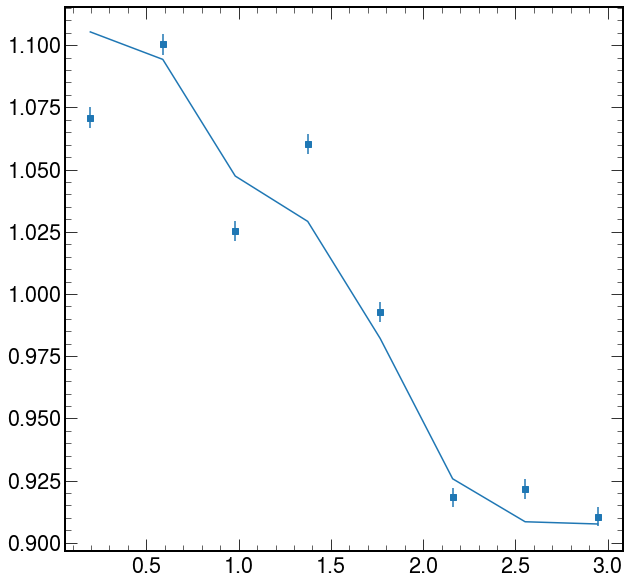

0
dY	0	D	0.048
1
dY	1	D	0.022
2
dY	2	D	0.039
3
dY	3	D	0.047


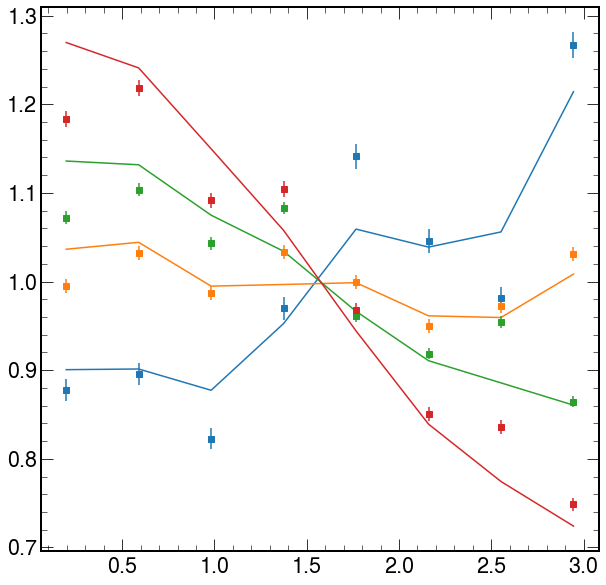

0
pT1	0	D	0.022
1
pT1	1	D	0.022
2
pT1	2	D	0.028


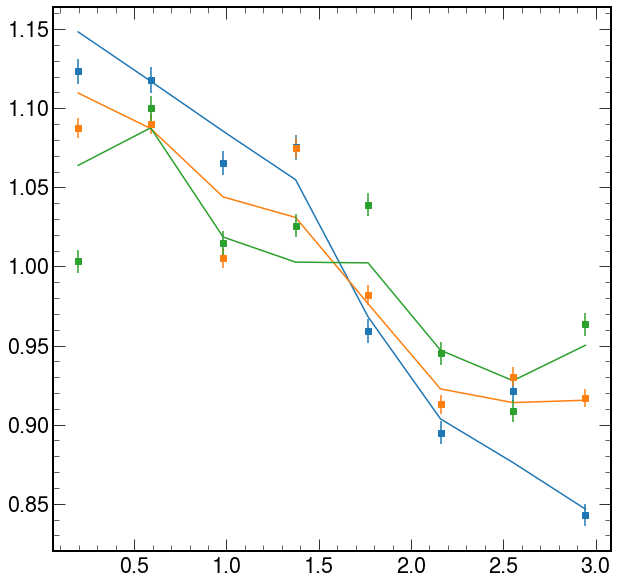

0
pT2	0	D	0.020
1
pT2	1	D	0.015
2
pT2	2	D	0.038


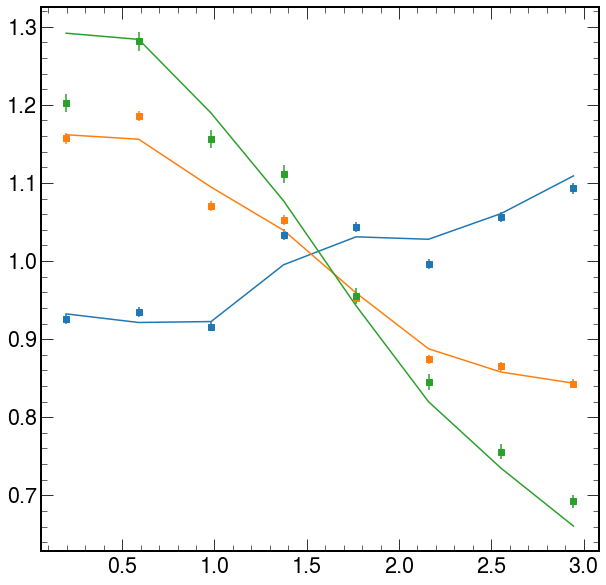

In [184]:
colors = "tab:blue tab:orange tab:green tab:red".split()
for key in ["all","dY","pT1","pT2"]:
    
    
    for j in range(len(all_data[key])):
        for A in "D":
            print(j)
            df = all_data[key][j][A]
            plt.errorbar(df.phi,df.M,df.dMstat, marker='s', linestyle='', color=colors[j])
            plt.plot(df.phi,df.M_alt, color=colors[j])
            syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
            print(key,j,A, "%.3f"%syst, sep='\t')
    plt.show()

In [ ]:
#data, GiBUU = make_plots(None,  pThetaCutsGiBUU=True)
#all_data['all']=data
#all_GiBUU['all']=GiBUU

In [ ]:
#data, GiBUU = make_plots(None,  pThetaCutsGiBUU=False)
#all_data['all']=data
#all_GiBUU['all']=GiBUU

In [ ]:
#data, GiBUU = make_plots("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0),  pThetaCutsGiBUU=True,nbins=8)
#all_data['drap']=data
#all_GiBUU['drap']=GiBUU

#print(corr_func_data_dphi_dY)

In [ ]:

#make_plots("pair_pt", "p^T_{\\rm pair}", (0,0.25, 0.5, 0.75, 1))

In [ ]:

#data, GiBUU = make_plots("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),  pThetaCutsGiBUU=True,nbins=8)
#all_data['pT1']=data
#all_GiBUU['pT1']=GiBUU

In [ ]:
#data, GiBUU = make_plots("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),  pThetaCutsGiBUU=True, nbins=8)
#all_data['pT2']=data
#all_GiBUU['pT2']=GiBUU

In [ ]:
help(plt.legend)

In [ ]:
for a in 'C Fe Pb'.split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]
    plt.plot(x, ym, marker='o')
    plt.show()

    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    #print(len(ym))
    ym=pd.Series(ym)
    yd, x =np.histogram(df.dphi, bins=np.linspace(0, np.pi, nbins//2+1))
    yd = pd.Series(list(reversed(yd)) + list(yd))

    x=np.linspace(-np.pi, np.pi, nbins+1)
    x=(x[:-1]+x[1:])/2
    #print(len(yd))
    plt.plot(x,yd)  
    ym = (ym/(sum(ym)/len(ym)))
    plt.errorbar(x,yd/ym, np.sqrt(yd)/ym)
    plt.show()

In [ ]:
for a in "D C Fe Pb".split():
    df = dfs_data[a+"_2pi"].query("h1_cm_pt>.0707 and h2_cm_pt>.0707 and h2_z>0.05")

    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    
    plt.plot(x, ym, marker='o')
plt.show()



In [ ]:
def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    print(y1)
    ym=[0]*len(y1)
    print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]

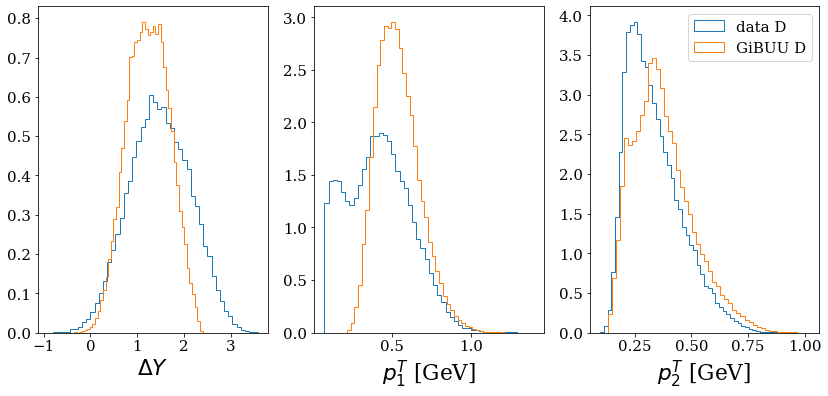

In [123]:
q="h1_pid==211 and h2_pid == -211 and h2_p>0.2 and h1_cm_pt>0.0707 and h2_cm_pt>0.0707 and " +\
        pThetaCuts_pair
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plt.sca(axs[0])

for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).drap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).drap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$\Delta Y$')

plt.sca(axs[1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_1$ [GeV]')


plt.sca(axs[2])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_2$ [GeV]')
plt.legend()
plt.show()

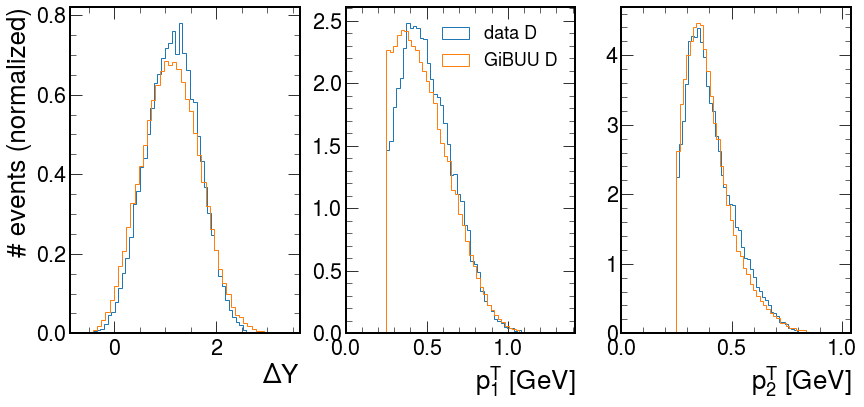

In [460]:
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
addCuts="" # " and h1_p<2.7 and h1_th>10"
q+= addCuts
#q+=" and h1_p<2.7"
#q+=" and h2_p>0.5"
#q+=" and h1_cm_pt>0.4"
fig, axs = plt.subplots(1, 3, figsize=(14, 6))
plt.sca(axs[0])

GiBUU_suffix="_tweak2"
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).drap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).drap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$\Delta Y$')

plt.sca(axs[1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h1_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_1$ [GeV]')
plt.xlim(0)

plt.sca(axs[2])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h2_cm_pt, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p^T_2$ [GeV]')
plt.xlim(0)

axs[0].set_ylabel("# events (normalized)")
axs[1].legend(fontsize=18)
plt.show()
    

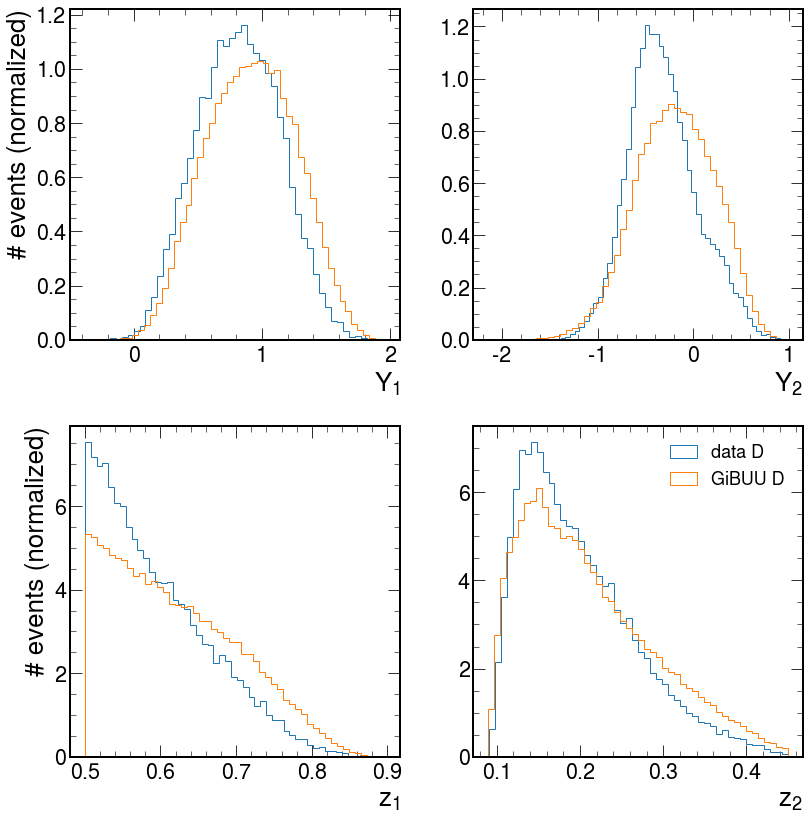

In [467]:
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
addCuts="" # " and h1_p<2.7 and h1_th>10"
q+= addCuts
#q+=" and h1_p<2.7"
#q+=" and h2_p>0.5"
#q+=" and h1_cm_pt>0.4"
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plt.sca(axs[0][0])

GiBUU_suffix="_tweak2"
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_rap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h1_rap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$Y_1$')

plt.sca(axs[0][1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_rap, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h2_rap, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$Y_2$')

plt.sca(axs[1][0])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_z, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h1_z, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$z_1$')

plt.sca(axs[1][1])
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h2_z, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q).h2_z, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$z_2$')
plt.legend(fontsize=18)

axs[0][0].set_ylabel("# events (normalized)")
axs[1][0].set_ylabel("# events (normalized)")
plt.tight_layout()
#plt.xlim(0)
plt.show()

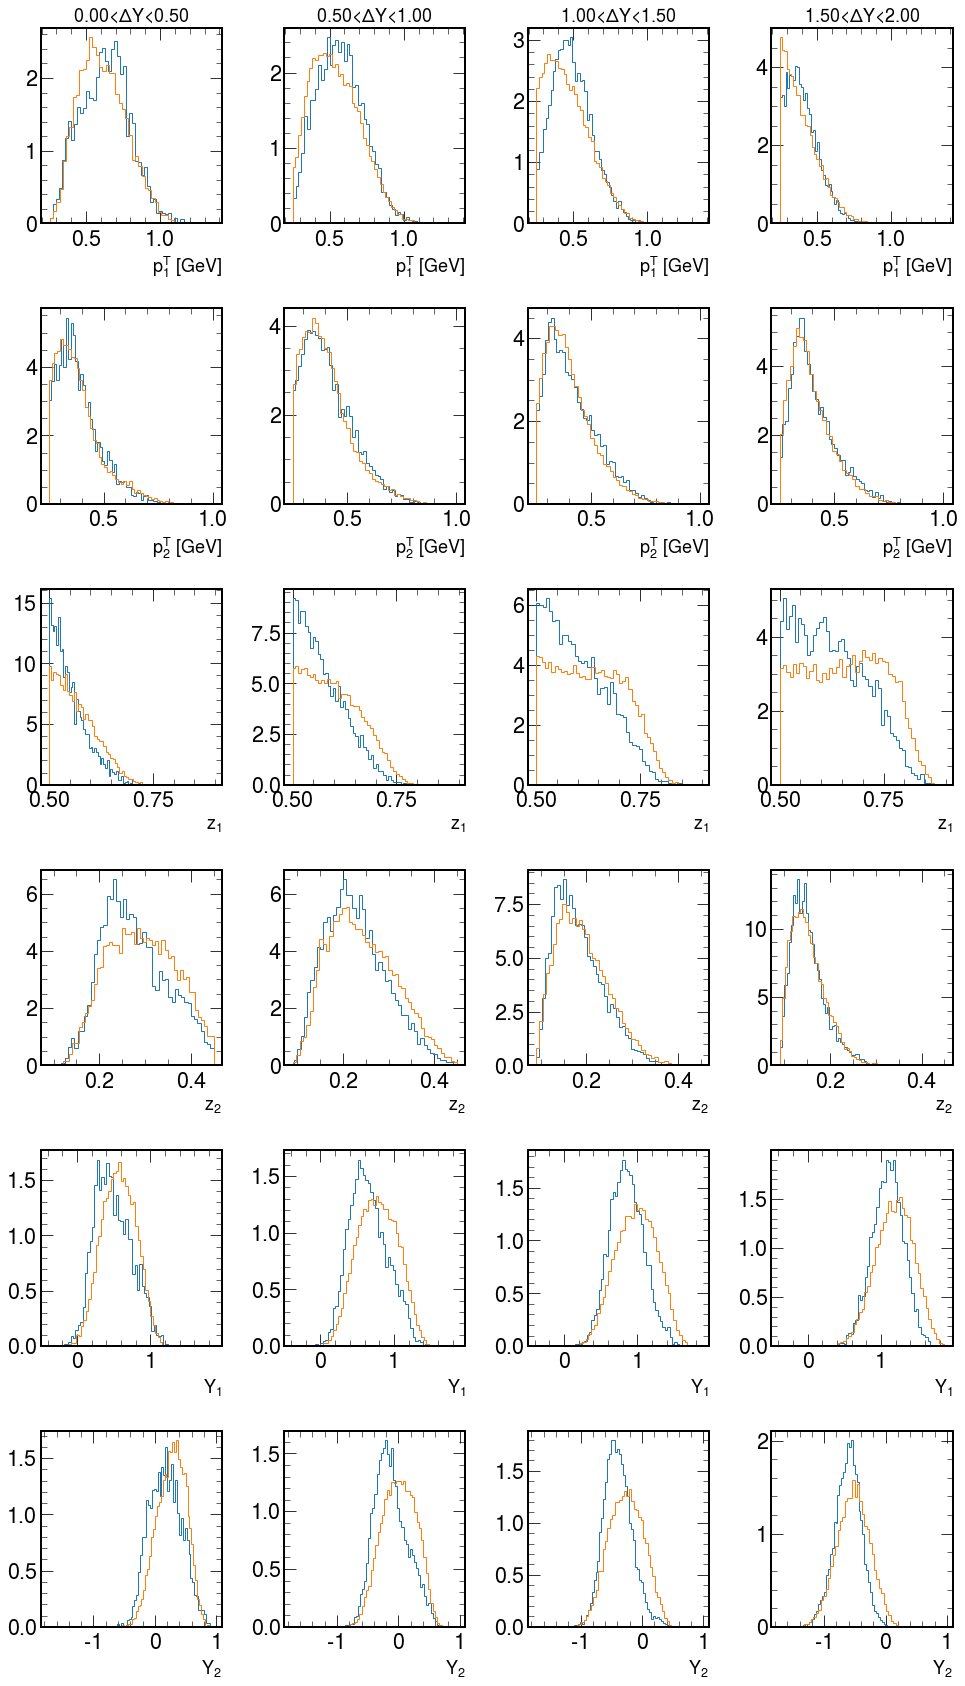

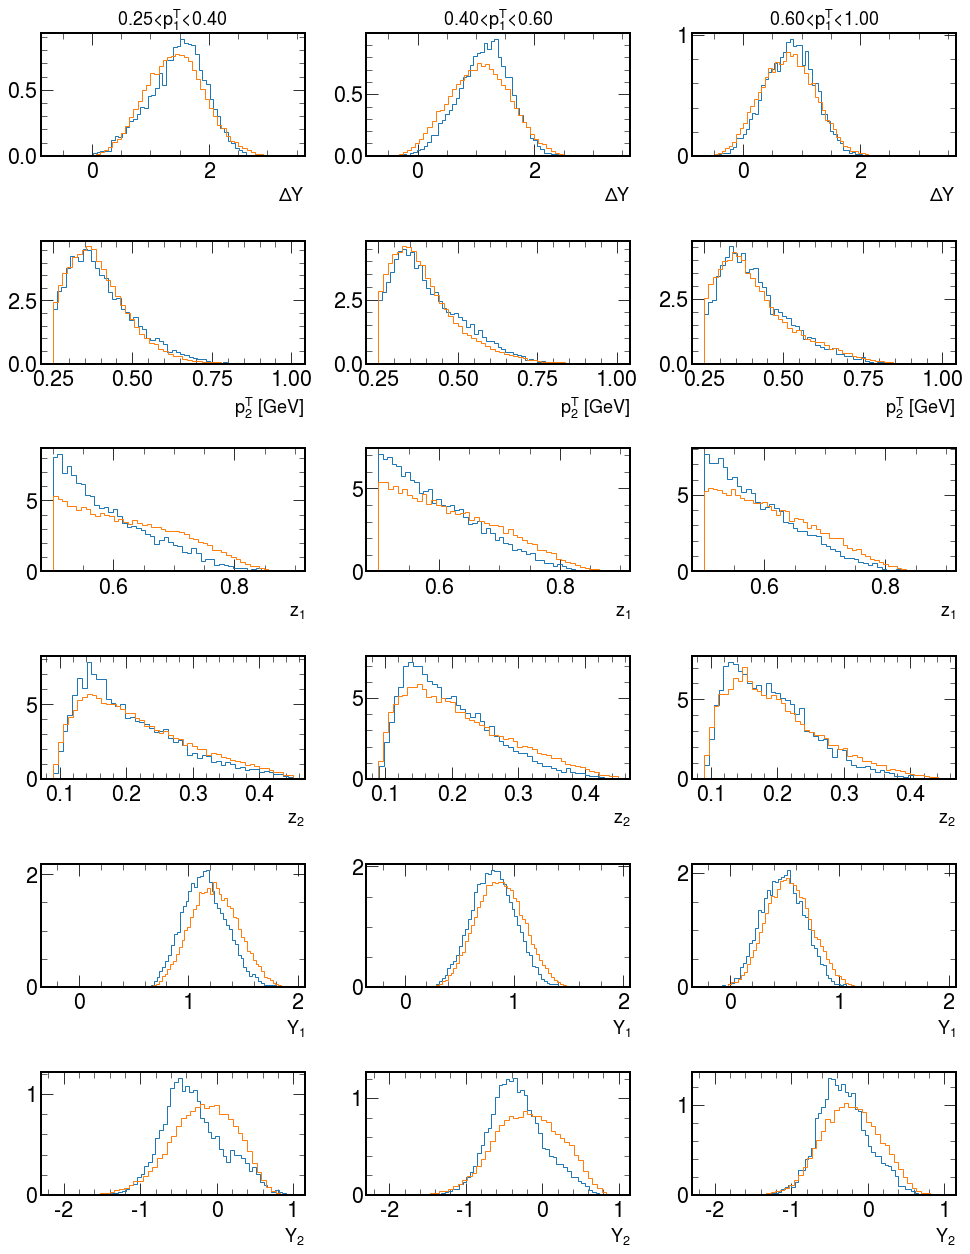

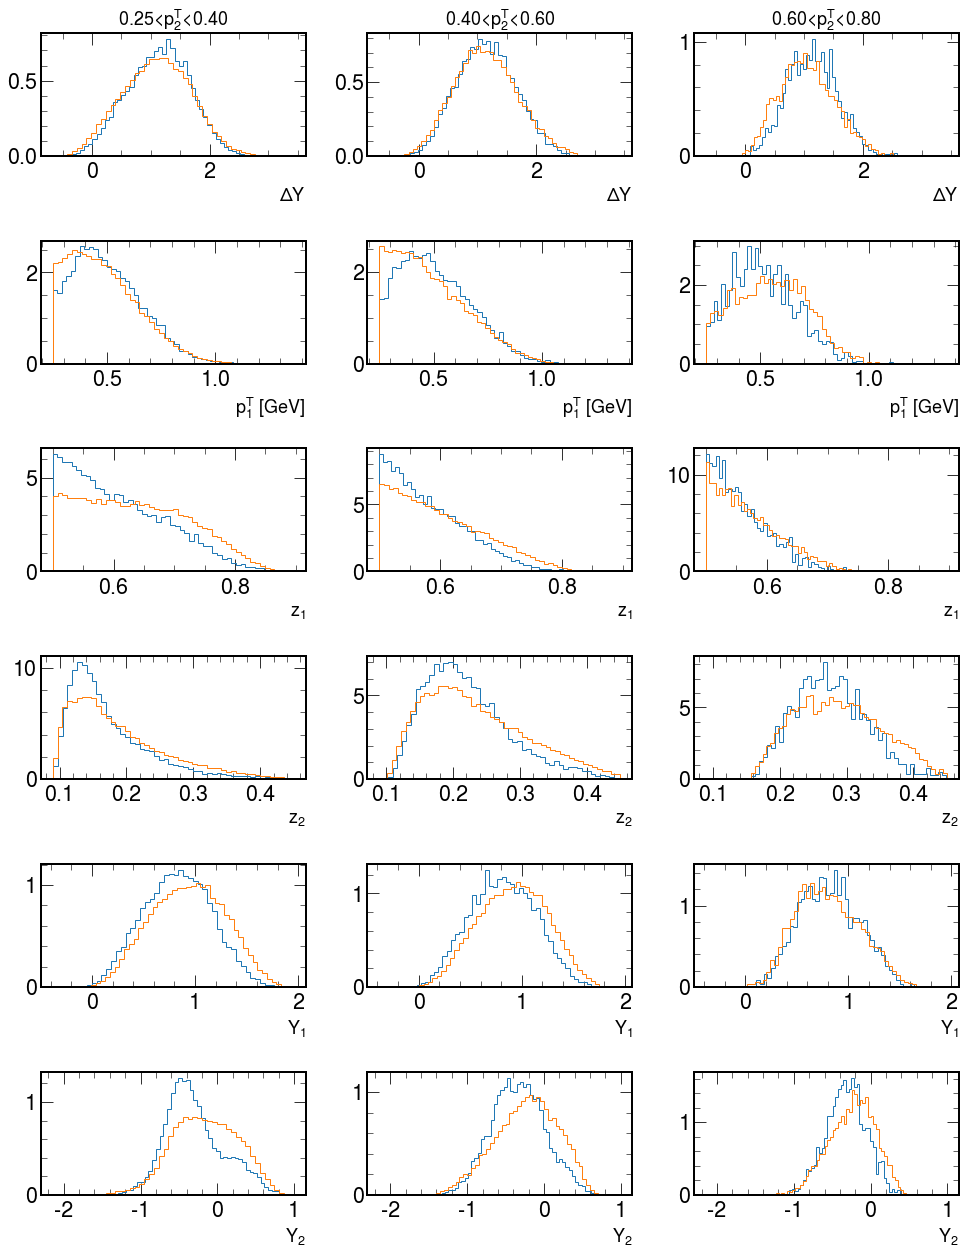

In [97]:
slicenames="drap", "h1_cm_pt", "h2_cm_pt"
slicelatexs="$\\Delta{}Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]"
slicevals=[0, 0.5, 1, 1.5, 2], [.25, .40,0.60, 1.0], [.25, .40,.60, .80]
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
GiBUU_suffix="_tweak2"
a='D'
dfd= dfs_pair[f'{a}'].query(q)
dfg = dfs_pair[f'GiBUU_{a}{GiBUU_suffix}'].query(q)

for slicename, slicelatex, sliceval in zip(slicenames, slicelatexs, slicevals):
    fig, axs =plt.subplots(6,len(sliceval)-1, figsize=(14, 6*(len(sliceval)-1)),
                          sharex='row')
    for i in range(len(sliceval)-1):
        xnames="drap h1_cm_pt h2_cm_pt h1_z h2_z h1_rap h2_rap".split()
        xnames=[name for name in xnames if name != slicename]
        xlatexs=("$\\Delta{}Y$", "$p^T_1$ [GeV]", "$p^T_2$ [GeV]", "$z_1$", 
                        "$z_2$", "$Y_1$", "$Y_2$")
        xlatexs=[name for name in xlatexs if name != slicelatex]
        for j in range(6):
            plt.sca(axs[j][i])
            sliceq=f"{slicename}>{sliceval[i]} and {slicename}<{sliceval[i+1]}"
            plt.hist(dfd.query(sliceq)[xnames[j]], bins=50, histtype='step', density=True)
            plt.hist(dfg.query(sliceq)[xnames[j]], bins=50, histtype='step', density=True)
            plt.xlabel(xlatexs[j],fontsize=18)
        axs[0][i].set_title(f"{sliceval[i]:.2f}<{slicelatex.split()[0]}<{sliceval[i+1]:.2f}",
                           fontsize=18)
    plt.tight_layout()
    plt.show()

In [367]:

q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
d=dfs_pair['D'].query(q)
len(d.query("h1_th>15"))/len(d)

0.75583163359911

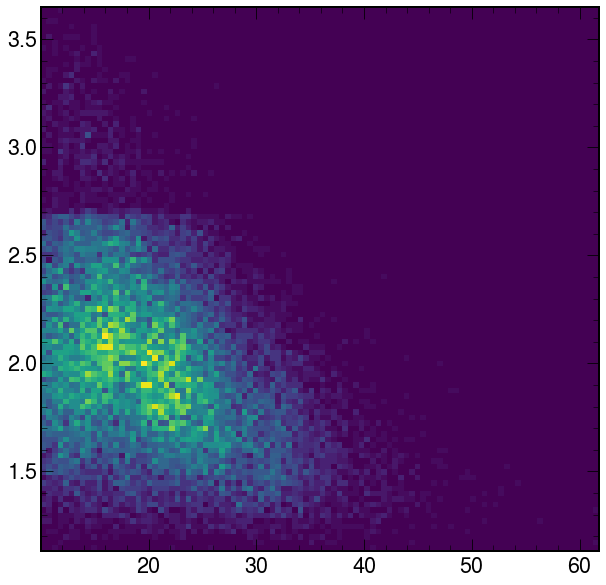

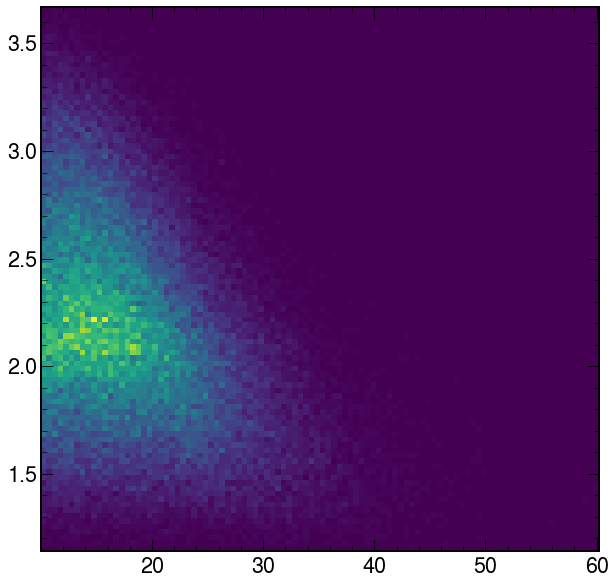

In [355]:



q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
plt.hist2d(dfs_pair['D'].query(q).h1_th, dfs_pair['D'].query(q).h1_p,bins=100)
plt.show()
plt.hist2d(dfs_pair['GiBUU_D_tweak2'].query(q).h1_th, dfs_pair['GiBUU_D_tweak2'].query(q).h1_p,bins=100)
plt.show()

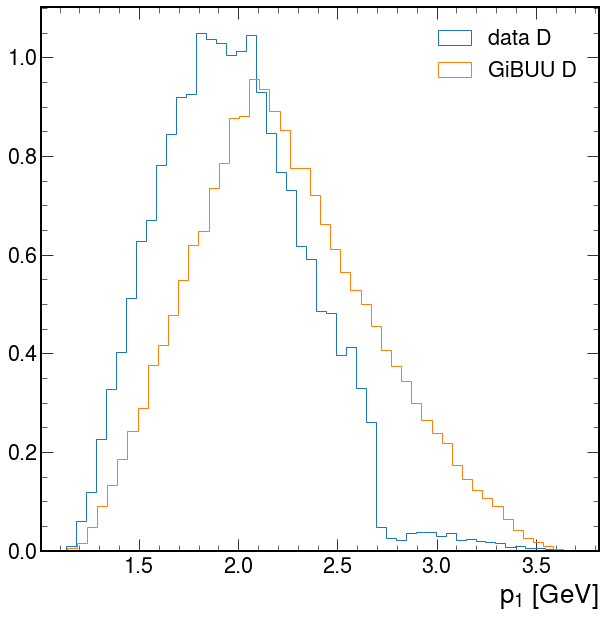

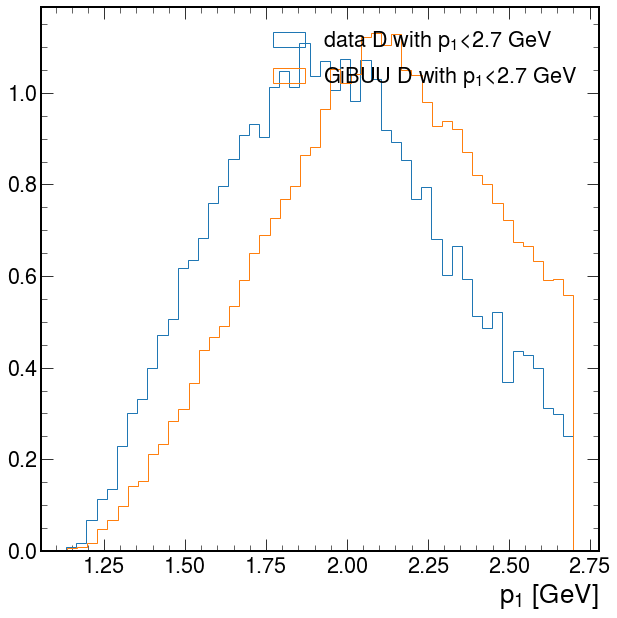

In [295]:
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q).h1_p, bins=50, density=True,
            label=f'data {a}', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q).h1_p, bins=50, density=True,
            label=f'GiBUU {a}', histtype='step')
plt.xlabel('$p_1$ [GeV]')
plt.legend()
plt.show()

for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7").h1_p, bins=50, density=True,
            label=f'data {a} with $p_1$<2.7 GeV', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7").h1_p, bins=50, density=True,
            label=f'GiBUU {a} with $p_1$<2.7 GeV', histtype='step')
plt.xlabel('$p_1$ [GeV]')
plt.legend()
plt.show()

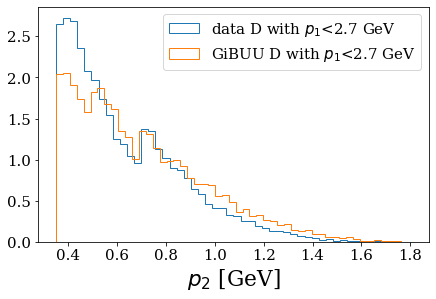

In [369]:
for a in 'D'.split():
    plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h2_p, bins=50, density=True,
            label=f'data {a} with $p_1$<2.7 GeV', histtype='step')
    plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h2_p, bins=50, density=True,
            label=f'GiBUU {a} with $p_1$<2.7 GeV', histtype='step')
plt.xlabel('$p_2$ [GeV]')
plt.legend()
plt.show()

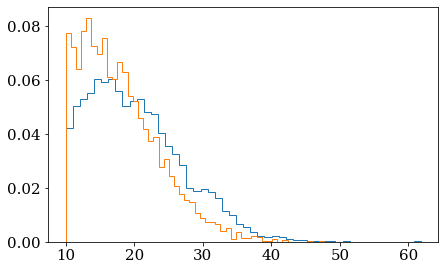

In [370]:
q="h2_z>0 and h1_pid==211 and h2_pid == -211 and h2_p>0.35 and h1_cm_pt>0.25 and h2_cm_pt>0.25 and " +\
        pThetaCuts_pair
#q+=" and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.35"

a = "D"
plt.hist(dfs_pair[f'{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h1_th, bins=50, 
         density=True, histtype='step')
plt.hist(dfs_pair[f'GiBUU_{a}'].query(q + " and h1_p<2.7 and h2_p>0.5 and h1_pid==211").h1_th, bins=50, 
         density=True, histtype='step')
plt.show()

In [93]:
len(dfs_pair["GiBUU_D"].query(pThetaCuts_trig.replace("h1_", "h2_")))

0

In [ ]:
dfs_pair["GiBUU_D"].eval("h2_th")

In [ ]:
#check some systematics:
import random
r = random.Random()

for s in 0, .2, .5:
    xx = []
    yy = []
    for sigma_inj in np.linspace(.5, 2, 16):
        sigma_res = 0.02
        nbins=8

        vals = []
        for i in range(10000):
            val = r.gauss(0,sigma_inj*(r.gauss(1, s)))+r.gauss(0,sigma_res)
            while val<-np.pi:
                val += 2*np.pi
            while val>np.pi:
                val -= 2*np.pi
            vals.append(val)
        sigma_actual = np.std(vals)
        y, x = np.histogram(np.abs(vals), bins=np.linspace(0, np.pi, nbins+1))

        x= (x[:-1]+ x[1:])/2
        sigma_extract = np.sqrt(sum(y*x**2)/sum(y))
        xx.append(sigma_actual)
        yy.append(sigma_extract)
    plt.plot(xx, np.subtract(yy,xx), linestyle='-')
#plt.plot((0,1.8), (0,1.8), linestyle='--' )


In [ ]:
help(r.gauss)

In [ ]:
# endcap correction
fig, axs = plt.subplots(4, 1, figsize=(7, 15), sharey='all', sharex='all')
for j,(key, nbins) in enumerate([("all", 1), ("dY", 4), ("pT1", 3), ("pT2", 3)]):
    plt.sca(axs[j])
    print(key)
    
    for i in range(nbins):
        df = all_data[key][i]['D']
        x= df.phi
        dx=x[1]-x[0]
        y = df.C/(df.C-df.C_correction_EC)
        dy = df.dCsyst_EC/df.C
        
        
        if key == 'all':
            label = "combined"
        else:
            label = all_sliceinfo[key][i]
        plt.plot(x, y, label=label)
        
        plt.fill_between(x, y-dy, y+dy, alpha=0.5)
        
        plt.xlabel("$|\Delta\phi|$ [rad]")
        plt.ylabel("$C^{\\rm corr}_D/C^{\\rm obs}_D$")
        
        #print(yDcorr/yD)
        print(np.sqrt(np.mean((yDcorr/yD-1)**2)), fAl*np.sqrt(np.mean(((yC-yFe)/yAl/2)**2)))
    plt.legend()
plt.show()

In [ ]:
# endcap correction
fig, axs = plt.subplots(4, 1, figsize=(7, 15), sharey='all', sharex='all')
for j,(key, nbins) in enumerate([("all", 1), ("drap", 4), ("pT1", 3), ("pT2", 3)]):
    plt.sca(axs[j])
    print(key)
    
    for i in range(nbins):
        yD = all_data[key][('D', 211, i)]['y']
        dyD = all_data[key][('D', 211, i)]['dystat']
        yC = all_data[key][('C', 211, i)]['y']
        dyC = all_data[key][('C', 211, i)]['dystat']
        yFe = all_data[key][('Fe', 211, i)]['y']
        dyFe = all_data[key][('Fe', 211, i)]['dystat']
        x = all_data[key][('Fe', 211, i)]['bins']
        x= (x[:-1]+x[1:])/2
        dx=x[1]-x[0]
        
        fAl = 0.02
        
        #use corrections assuming C(Al) is halfway between C(C) and C(Fe)
        yAl = (yC+yFe)/2
        
        # uncertainty from the stat uncertainty on the Al interpolation, 
        # and also from the interpolation itself
        dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
        yDcorr = (yD-fAl*yAl)
        dyDcorr= fAl*dyAl
        yDcorr/=dx*sum(yDcorr)
        dyDcorr/=dx*sum(yDcorr)
        
        yD/=dx*sum(yD)
        
        if key == 'all':
            label = "combined"
        else:
            d = all_data[key][('D', 211, i)]
            label = f'{d["slice_range"][0]:.2f} < ${d["slicevartex"]}$ < {d["slice_range"][1]:.2f}'
        plt.plot(x, yDcorr/yD, label=label)
        
        plt.fill_between(x, (yDcorr-dyDcorr)/yD, (yDcorr+dyDcorr)/yD, alpha=0.5)
        
        plt.xlabel("$|\Delta\phi|$ [rad]")
        plt.ylabel("$C^{\\rm corr}_D/C^{\\rm obs}_D$")
        
        #print(yDcorr/yD)
        print(np.sqrt(np.mean((yDcorr/yD-1)**2)), fAl*np.sqrt(np.mean(((yC-yFe)/yAl/2)**2)))
    plt.legend()
plt.show()

In [147]:
list(dfs_pair['C'].columns)

['dphi',
 'dphi_lab',
 'drap',
 'h1_z',
 'h2_z',
 'h1_cm_pt',
 'h2_cm_pt',
 'h1_xf',
 'h2_xf',
 'h1_rap',
 'ycm',
 'h2_rap',
 'h1_pid',
 'h2_pid',
 'h1_cm_ph',
 'h2_cm_ph',
 'h1_cm_th',
 'h2_cm_th',
 'pair_mass',
 'pair_pt',
 'mx_eh1h2x',
 'mx_eh1x',
 'mx_eh2x',
 't',
 'Q2',
 'nu',
 'W',
 'SampFracEl25',
 'SampFracEl20',
 'TargTypeSM',
 'TargType',
 'x',
 'u',
 'h1_ph',
 'h1_th',
 'h2_ph',
 'h2_th',
 'h1_deltaZ',
 'h2_deltaZ',
 'h1_Nphe',
 'h2_Nphe',
 'h1_Sector',
 'h2_Sector',
 'h1_FidCutPiPlus',
 'h2_FidCutPiPlus',
 'h1_Chi2CC',
 'h2_Chi2CC',
 'h1_StatCC',
 'h2_StatCC',
 'evnt',
 'inelasticity',
 'h1_e',
 'h1_p',
 'z_tot',
 'h2_e',
 'h2_p',
 'pair_pt2',
 'theta_e',
 'theta_qe',
 'e_q_pz',
 'e_q_pt',
 'dtheta_epi1']

(array([ 985.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9140.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

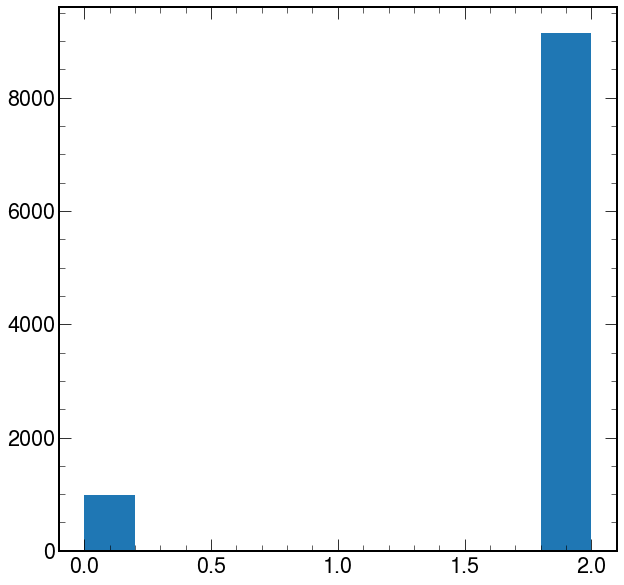

In [166]:
plt.hist(dfs_pair['Pb'].TargTypeSM)

In [154]:
#tighter cut on CC
p_thr=2.5
#Nphe_thr=15
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)

CC_alt_cut=f"{Nphe_h1_cut} and {Chi2CC_h1_cut} and {StatCC_h1_cut}"

In [172]:
for df in dfs_mixed.values():
    df.eval('TargTypeSM=1.5', inplace=True)

In [208]:
def get_widths(dfs):
    ret = []
    for i in range(len(dfs)):
        widths={}
        for k in range(4):
            A = "D C Fe Pb".split()[k]
            df = dfs[i][A]
                
            y = df.C
            dystat = df.dCstat
            dytot= np.hypot(df.dCstat, df.dCsyst)
            phi=df.phi
            #print(y, dy, phi)
            binwidth=(-phi[:-1]+phi[1:])
            #width=np.sqrt(sum(y*((phi-np.pi)**2-binwidth**2/12))/sum(y))
            width=np.sqrt(sum(y*((phi-np.pi)**2))/sum(y))
            widths[A]=width
        ret.append(widths)
    return ret
def get_broadenings(widths):
    print(len(widths))
    ret = []
    for i in range(len(widths)):
        print(widths[i])
        broadenings={}
        for k in range(3):
            A = "C Fe Pb".split()[k]
            broadenings[A]=np.sqrt(widths[i][A]**2-widths[i]["D"]**2)
        ret.append(broadenings)
    return ret

In [209]:
d={}
#varname = "variation name"
for varname, cut in [("nominal",{}),
                     ("vtx_alt", dict(addCuts="TargTypeSM>0",
                                           addCutsTrig="TargTypeSM>0")),
                     ("p2_gt_370",dict(addCuts="h2_p>.37")),
                    ("pt_gt_27", dict(addCuts="h2_cm_pt>.27 and h1_cm_pt>.27", 
                                      addCutsTrig="h1_cm_pt>.27")),
                    ("vtx_dZ_lt_2pt7", dict(addCuts="abs(h1_deltaZ)<2.7 and abs(h2_deltaZ)<2.7",
                                           addCutsTrig="abs(h1_deltaZ)<2.7")),
                    
                    ("CC_thresh_2pt5", dict(addCuts=CC_alt_cut, addCutsTrig=CC_alt_cut)),
                     
                    ]:

    d[(varname,"all")], _, _ = get_values(None,GiBUU_suffix='_tweak2', **cut)
    d[(varname, "dY")], _, _ = get_values("drap", "\Delta Y", (0, 0.5, 1,1.5, 2.0),GiBUU_suffix='_tweak2', **cut)
    d[(varname, "pT1")], _, _ = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),
                                    GiBUU_suffix='_tweak2', **cut)
    d[(varname, "pT2")], _, _ = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4,0.6, 0.8),
                                    GiBUU_suffix='_tweak2', **cut)
    
    for key in "all", "dY", "pT1", "pT2":
        d[(varname,key, "width")] = get_widths(d[(varname,key)])
        d[(varname,key, "broadening")] = get_broadenings(d[(varname,key, "width")])

1
{'D': 1.1052860147422903, 'C': 1.235130380564531, 'Fe': 1.2945468233259503, 'Pb': 1.3219197593813055}
4
{'D': 0.9523316316145373, 'C': 1.1279294383540883, 'Fe': 1.1675775345485633, 'Pb': 1.197370061908485}
{'D': 1.0215523673072417, 'C': 1.1723239672936598, 'Fe': 1.2268382285087698, 'Pb': 1.26199573176269}
{'D': 1.1273844272454236, 'C': 1.2755458853119561, 'Fe': 1.3505353390046813, 'Pb': 1.318686605152135}
{'D': 1.227626750093398, 'C': 1.3093215967366227, 'Fe': 1.3879322826262461, 'Pb': 1.4720307972063926}
3
{'D': 1.3597499173132335, 'C': 1.4392148070007076, 'Fe': 1.4626401173050603, 'Pb': 1.557704956211748}
{'D': 1.0664319959692208, 'C': 1.2182894492390903, 'Fe': 1.2689901692014915, 'Pb': 1.291262956279204}
{'D': 0.8083532478227163, 'C': 1.034965267759948, 'Fe': 1.1276746550443715, 'Pb': 1.1145033143682928}
3
{'D': 1.2987617197298094, 'C': 1.416568200595823, 'Fe': 1.4698176257266344, 'Pb': 1.4732053121313111}
{'D': 0.9673759180124243, 'C': 1.124831847591431, 'Fe': 1.1716946498048426,

In [239]:
cut_syst_table={}
all_bins=[]
for key in "all", "dY", "pT1", "pT2":
    cut_syst_table[key] =[]
    for i in range(len(d[("nominal", key)])):
        sumsq=0
        dct={}
        for varname in ("p2_gt_370","pt_gt_27", "vtx_dZ_lt_2pt7",
                       "CC_thresh_2pt5"):
            sumdiffs=0
            N=0
            for a in "D C Fe Pb".split():
                diff = d[(varname, key)][i][a].C/d[("nominal", key)][i][a].C-1
                sumdiffs+=diff
                N+=1
            avgdiff=sumdiffs/N
            dct[varname]=avgdiff
            sumsq+=avgdiff**2
        dct["tot"]=np.sqrt(sumsq/len(dct))
        all_bins+=list(dct["tot"])
        print(key, i, dct['tot'])
        cut_syst_table[key].append(pd.DataFrame(dct))
print("median", pd.Series(all_bins).median())
print("max", pd.Series(all_bins).max())
import pickle
with open("syst_from_cuts.pkl", "wb") as f:
    pickle.dump(cut_syst_table, f, pickle.HIGHEST_PROTOCOL)

all 0 0    0.049774
1    0.044852
2    0.034920
3    0.024987
4    0.018594
5    0.009670
6    0.010615
7    0.018542
Name: C, dtype: float64
dY 0 0    0.037180
1    0.081813
2    0.072081
3    0.033459
4    0.028696
5    0.008854
6    0.017868
7    0.025632
Name: C, dtype: float64
dY 1 0    0.056552
1    0.031951
2    0.025686
3    0.022804
4    0.021343
5    0.013136
6    0.003871
7    0.013800
Name: C, dtype: float64
dY 2 0    0.045227
1    0.055560
2    0.028615
3    0.022645
4    0.023061
5    0.006712
6    0.008790
7    0.016773
Name: C, dtype: float64
dY 3 0    0.053707
1    0.036216
2    0.046774
3    0.036074
4    0.016300
5    0.011703
6    0.020230
7    0.025347
Name: C, dtype: float64
pT1 0 0    0.054989
1    0.045361
2    0.042143
3    0.021381
4    0.008022
5    0.008579
6    0.014999
7    0.024914
Name: C, dtype: float64
pT1 1 0    0.031764
1    0.040839
2    0.016935
3    0.018059
4    0.016791
5    0.011188
6    0.005517
7    0.014058
Name: C, dtype: float64
pT1 2 0   

In [251]:
cut_syst_table_widths={}
for key in "all", "dY", "pT1", "pT2":
    cut_syst_table_widths[key] =[]
    for i in range(len(d[("nominal", key)])):
        sumsq=0
        dct={}
        for varname in ("p2_gt_370","pt_gt_27", "vtx_dZ_lt_2pt7",
                       "CC_thresh_2pt5"):
            sumdiffs=0
            N=0
            for a in "D C Fe Pb".split():
                diff = d[(varname, key, "width")][i][a]/d[("nominal", key, "width")][i][a]-1
                sumdiffs+=diff
                N+=1
            avgdiff=sumdiffs/N
            dct[varname]=avgdiff
            sumsq+=avgdiff**2
        dct["tot"]=np.sqrt(sumsq/len(dct))
        print(key, i, dct['tot'], dct['tot']*d[(varname, key, "width")][i][a])
        cut_syst_table_widths[key].append(dct)

with open("syst_from_cuts_widths.pkl", "wb") as f:
    pickle.dump(cut_syst_table_widths, f, pickle.HIGHEST_PROTOCOL)

all 0 0.013060535684879061 0.017198282530826673
dY 0 0.017843137876900516 0.021184551758254712
dY 1 0.010303429190828321 0.012987020266976144
dY 2 0.01237820702531379 0.016403683036002443
dY 3 0.015382457736331526 0.022654586034861424
pT1 0 0.014248396391862284 0.0220138868897643
pT1 1 0.008303810745755135 0.010760273894778504
pT1 2 0.008754473876513203 0.009727922445437081
pT2 0 0.015801907334050708 0.023145163449301044
pT2 1 0.00634966319231387 0.007687855566728748
pT2 2 0.00428410205691346 0.004149401885866856


In [252]:
cut_syst_table_broadenings={}
for key in "all", "dY", "pT1", "pT2":
    cut_syst_table_broadenings[key] =[]
    for i in range(len(d[("nominal", key)])):
        sumsq=0
        dct={}
        for varname in ("p2_gt_370","pt_gt_27", "vtx_dZ_lt_2pt7",
                       "CC_thresh_2pt5"):
            sumdiffs=0
            N=0
            for a in "C Fe Pb".split():
                diff = d[(varname, key, "broadening")][i][a]/d[("nominal", key, "broadening")][i][a]-1
                sumdiffs+=diff
                N+=1
            avgdiff=sumdiffs/N
            dct[varname]=avgdiff
            sumsq+=avgdiff**2
        dct["tot"]=np.sqrt(sumsq/len(dct))
        print(key, i, dct['tot'])
        cut_syst_table_broadenings[key].append(dct)
with open("syst_from_cuts_broadenings.pkl", "wb") as f:
    pickle.dump(cut_syst_table_broadenings, f, pickle.HIGHEST_PROTOCOL)

all 0 0.006890004219588428
dY 0 0.013183942428199518
dY 1 0.006032597841118709
dY 2 0.008683798653324616
dY 3 0.01082493065358839
pT1 0 0.016420688588394378
pT1 1 0.007128235465988102
pT1 2 0.005880746961000834
pT2 0 0.014973926088391182
pT2 1 0.0030578002514600263
pT2 2 0.008196122848863653


Text(0, 1, '$M(\\Delta\\phi)$')

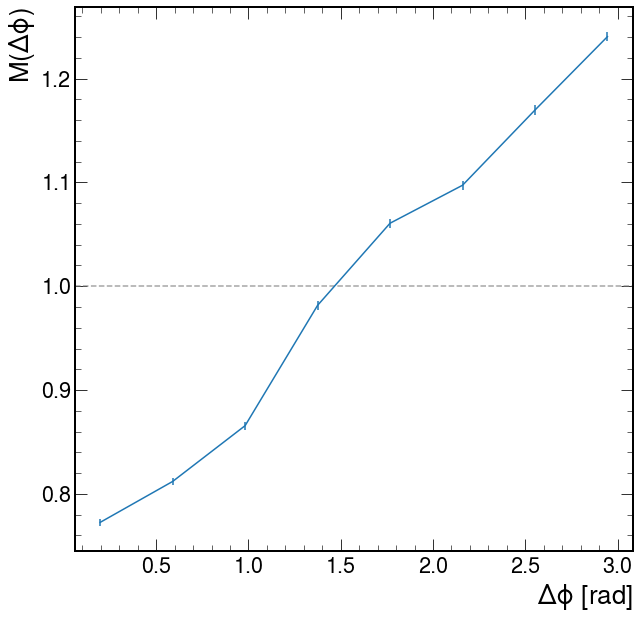

In [81]:
df = all_data['all'][0]['D']
plt.errorbar(df.phi, df.M, df.dMstat)
#plt.errorbar(df.phi, df.M*(1-0.1*np.cos(df.phi)), df.dMstat)
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')
plt.xlabel("$\Delta\phi$ [rad]")
plt.ylabel("$M(\Delta\phi)$")

(array([2.78000e+02, 7.03000e+02, 2.53870e+04, 1.32621e+05, 1.34628e+05,
        6.90572e+05, 1.32951e+05, 2.56900e+04, 6.94000e+02, 2.93000e+02]),
 array([-5.55111512e-17, -4.44089210e-17, -3.33066907e-17, -2.22044605e-17,
        -1.11022302e-17,  0.00000000e+00,  1.11022302e-17,  2.22044605e-17,
         3.33066907e-17,  4.44089210e-17,  5.55111512e-17]),
 <BarContainer object of 10 artists>)

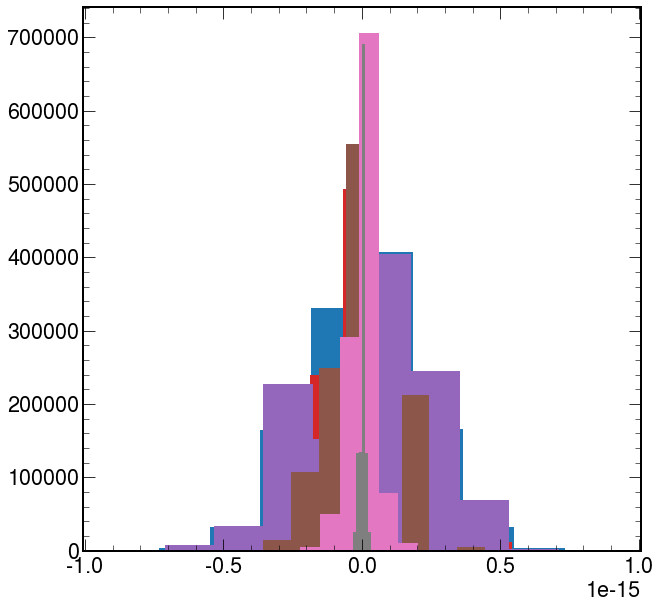

In [584]:
for df in dfs_mixed.values():
    #print(list(df.columns))
    df.eval("lx=(-mixevt_e_px)",inplace=True)
    df.eval("ly=(-mixevt_e_py)",inplace=True)
    df.eval("lz=(-mixevt_e_pz+5.014)",inplace=True)
    df.eval("lmag=sqrt(lx**2+ly**2+lz**2)",inplace=True)
    df.eval("lx=lx/lmag",inplace=True)
    df.eval("ly=ly/lmag",inplace=True)
    df.eval("lz=lz/lmag",inplace=True)
    df.eval("edotl=lx*mixevt_e_px+ly*mixevt_e_py+lz*mixevt_e_pz",inplace=True)
    df.eval("sx=(mixevt_e_px - edotl*lx)",inplace=True)
    df.eval("sy=(mixevt_e_py - edotl*ly)",inplace=True)
    df.eval("sz=(mixevt_e_pz - edotl*lz)",inplace=True)
    df.eval("smag=sqrt(sx**2+sy**2+sz**2)",inplace=True)
    df.eval("sx=sx/smag",inplace=True)
    df.eval("sy=sy/smag",inplace=True)
    df.eval("sz=sz/smag",inplace=True)
    df.eval("nx=ly*sz-lz*sy",inplace=True)
    df.eval("ny=lz*sx-lx*sz",inplace=True)
    df.eval("nz=lx*sy-ly*sx",inplace=True)
    df.eval("phi2_fix= arctan2(h2_px*nx+h2_py*ny+h2_pz*nz,h2_px*sx+h2_py*sy+h2_pz*sz)",inplace=True)
    #df.eval("phi2_fix= h2_cm_ph",inplace=True)
    df.eval("dphi_fix= h1_cm_ph-phi2_fix", inplace=True)
    df.eval(f"pi={np.pi}", inplace=True)
    df.eval("dphi_fix=dphi_fix+2*pi*(dphi_fix<pi)", inplace=True)
    df.eval("dphi_fix=dphi_fix-2*pi*(dphi_fix>pi)", inplace=True)
    df.eval("dphi_fix=abs(dphi_fix)", inplace=True)
    #df.eval("dphi_fix+=(dphix_fix<-2*pi)", inplace=True)
    #df.eval("dphi_fix= dphi_fix*(dphi_fix<3.14159265)+(2*3.14159265-dphi_fix)*(dphi_fix>3.14159265)", inplace=True)
plt.hist(df.eval("lx*sx+ly*sy+lz*sz"))
plt.hist(df.eval("lx*nx+ly*ny+lz*nz"))
plt.hist(df.eval("nx*sx+ny*sy+nz*sz"))
plt.hist(df.eval("sx*sx+sy*sy+sz*sz-1"))
plt.hist(df.eval("nx*nx+ny*ny+nz*nz-1"))
plt.hist(df.eval("lx*lx+ly*ly+lz*lz-1"))
plt.hist(df.eval("nx*mixevt_e_px+ny*mixevt_e_py+nz*mixevt_e_pz"))
plt.hist(df.eval("nz"))

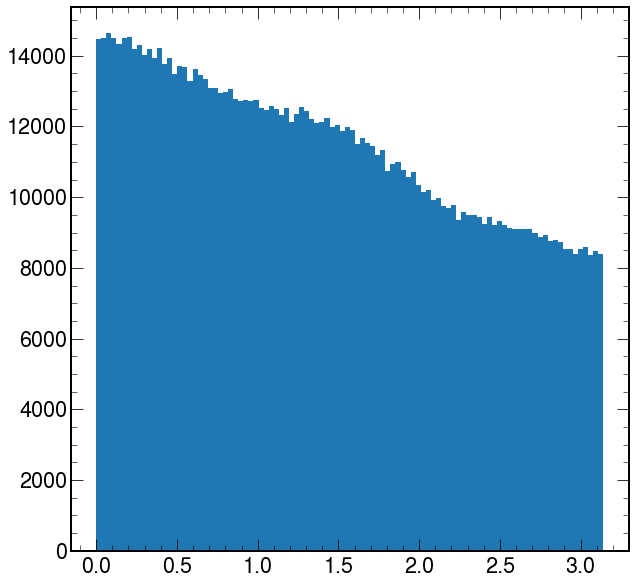

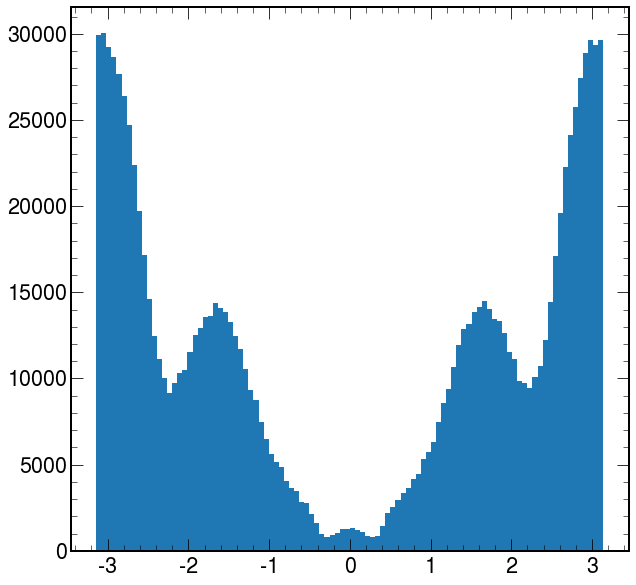

In [585]:
plt.hist(df.dphi_fix,bins=100)
plt.show()
plt.hist(df.h1_cm_ph,bins=100)
plt.show()

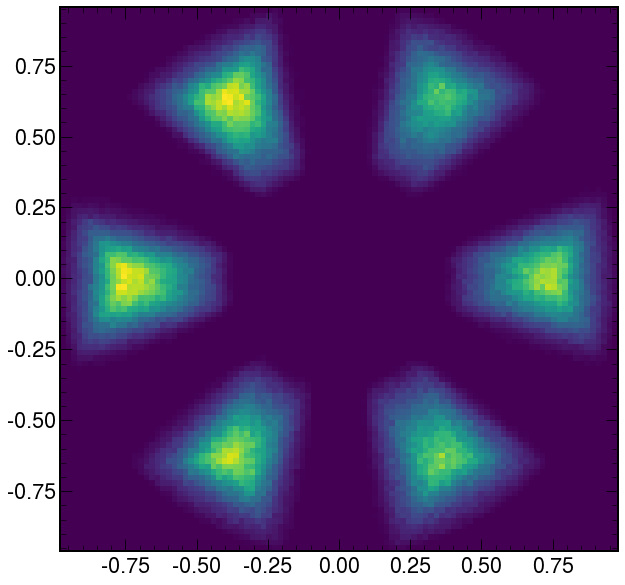

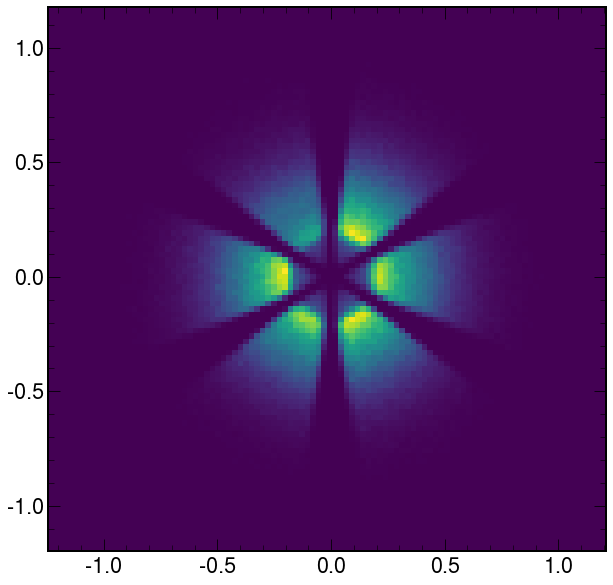

In [549]:
plt.hist2d(df['mixevt_e_px'], df['mixevt_e_py'], bins=100)
plt.show()
plt.hist2d(df['h2_px'], df['h2_py'], bins=100)
plt.show()

(array([      0.,       0.,       0.,       0.,       0., 1143817.,
              0.,       0.,       0.,       0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

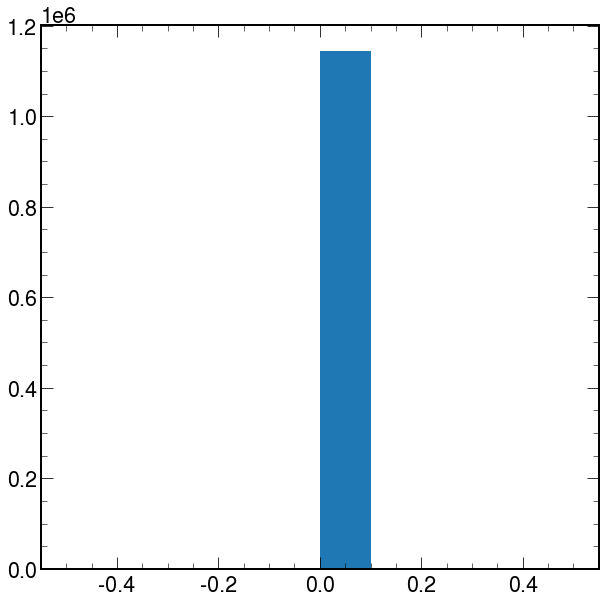

In [561]:
plt.hist(df.eval("h2_px/h2_px*arctan2(0,1)"))

(array([2.80416e+05, 1.83433e+05, 1.34668e+05, 1.00578e+05, 7.95300e+04,
        6.27700e+04, 5.01510e+04, 4.11890e+04, 3.47900e+04, 2.83400e+04,
        2.30950e+04, 1.87800e+04, 1.56790e+04, 1.29420e+04, 1.10550e+04,
        9.45400e+03, 8.28600e+03, 7.09600e+03, 6.09800e+03, 5.07100e+03,
        4.33500e+03, 3.80500e+03, 3.11300e+03, 2.55000e+03, 2.24800e+03,
        1.91700e+03, 1.70100e+03, 1.32100e+03, 1.14900e+03, 1.02200e+03,
        7.73000e+02, 7.44000e+02, 6.19000e+02, 5.44000e+02, 5.50000e+02,
        4.03000e+02, 3.18000e+02, 3.47000e+02, 3.14000e+02, 2.25000e+02,
        2.66000e+02, 2.09000e+02, 1.72000e+02, 1.62000e+02, 1.67000e+02,
        1.27000e+02, 1.16000e+02, 1.25000e+02, 1.03000e+02, 9.40000e+01,
        1.00000e+02, 8.60000e+01, 7.00000e+01, 4.70000e+01, 3.70000e+01,
        5.70000e+01, 4.10000e+01, 3.30000e+01, 3.60000e+01, 1.80000e+01,
        2.30000e+01, 3.10000e+01, 2.90000e+01, 3.60000e+01, 2.70000e+01,
        2.40000e+01, 1.30000e+01, 1.40000e+01, 1.50

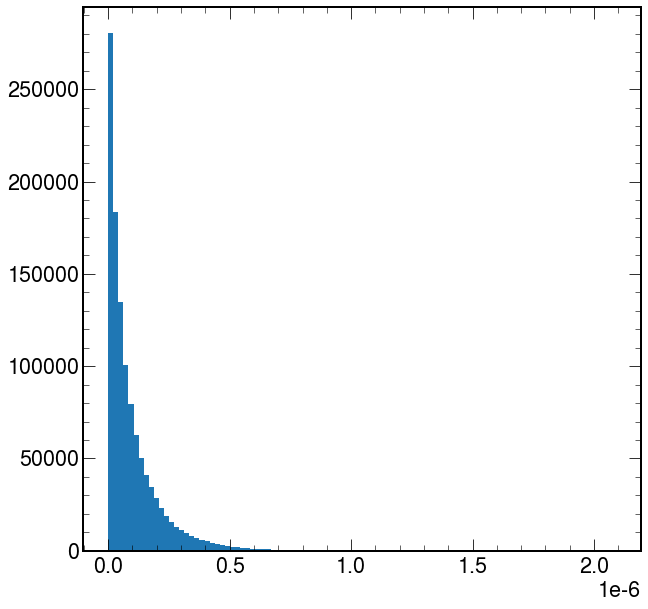

In [579]:
for df in dfs_mixed.values():
    #print(list(df.columns))
    df.eval("lx=(-e_px)",inplace=True)
    df.eval("ly=(-e_py)",inplace=True)
    df.eval("lz=(-e_pz+5.014)",inplace=True)
    df.eval("lmag=sqrt(lx**2+ly**2+lz**2)",inplace=True)
    df.eval("lx=lx/lmag",inplace=True)
    df.eval("ly=ly/lmag",inplace=True)
    df.eval("lz=lz/lmag",inplace=True)
    df.eval("edotl=lx*e_px+ly*e_py+lz*e_pz",inplace=True)
    df.eval("sx=(e_px - edotl*lx)",inplace=True)
    df.eval("sy=(e_py - edotl*ly)",inplace=True)
    df.eval("sz=(e_pz - edotl*lz)",inplace=True)
    df.eval("smag=sqrt(sx**2+sy**2+sz**2)",inplace=True)
    df.eval("sx=sx/smag",inplace=True)
    df.eval("sy=sy/smag",inplace=True)
    df.eval("sz=sz/smag",inplace=True)
    df.eval("nx=ly*sz-lz*sy",inplace=True)
    df.eval("ny=lz*sx-lx*sz",inplace=True)
    df.eval("nz=lx*sy-ly*sx",inplace=True)
    df.eval("phi1_fix= arctan2(h1_px*nx+h1_py*ny+h1_pz*nz,h1_px*sx+h1_py*sy+h1_pz*sz)",inplace=True)
    #df.eval("phi2_fix= h2_cm_ph",inplace=True)
    df.eval("dphi_fix= h1_cm_ph-phi1_fix", inplace=True)
    df.eval(f"pi={np.pi}", inplace=True)
    df.eval("dphi_fix=dphi_fix+2*pi*(dphi_fix<pi)", inplace=True)
    df.eval("dphi_fix=dphi_fix-2*pi*(dphi_fix>pi)", inplace=True)
    df.eval("dphi_fix=abs(dphi_fix)", inplace=True)
plt.hist(df.dphi_fix, bins=100)

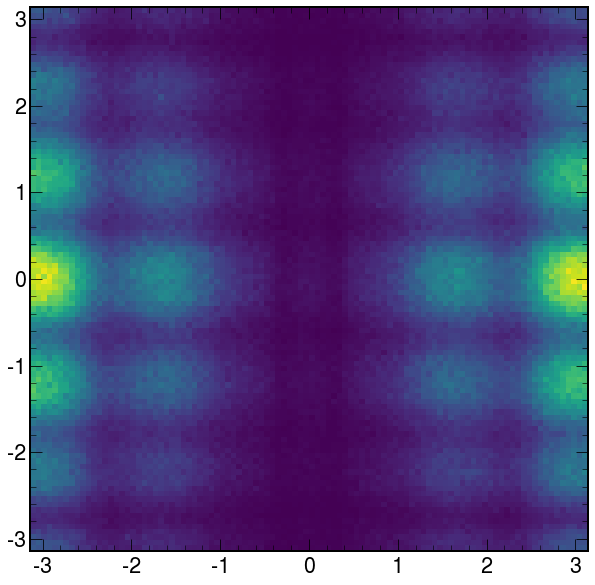

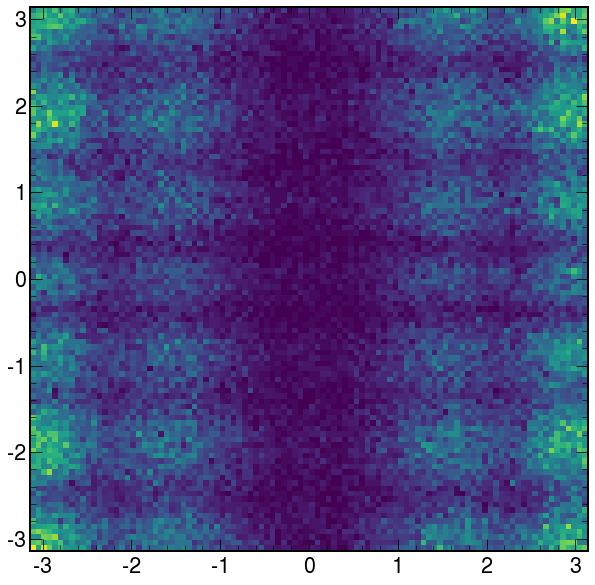

In [41]:
plt.hist2d(dfs_mixed['D'].h1_cm_ph[1:],dfs_mixed['D'].h2_cm_ph[:-1], bins=100)
plt.show()
plt.hist2d(dfs_pair['D'].h1_cm_ph[1:],dfs_pair['D'].h2_cm_ph[:-1], bins=100)

plt.show()

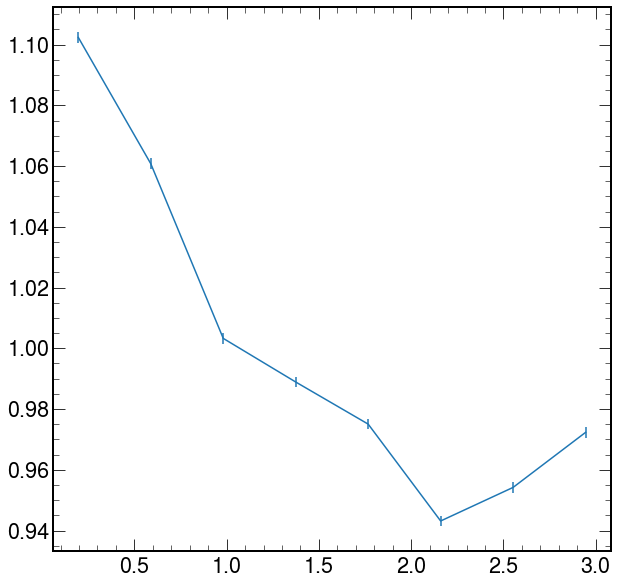

In [80]:
pid=211; pT1min=0.25; pT2min=0.25; pMin=0.35
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"

df = dfs_pair['D'].query(q)
s=0
for m in range(1,100):
    a=np.array(df.h1_cm_ph)[m:]-np.array(df.h2_cm_ph)[:-m]
    #weights=(np.array(df.h1_z)[m:]-np.array(df.h2_z)[:-m])<1
    #print(weights)
    a+=2*np.pi*(a<-np.pi)
    a-=2*np.pi*(a>=np.pi)
    n,x=np.histogram(abs(a), bins=8, weights=None, range=(0, np.pi))
    s+=n
dy=np.sqrt(s)/sum(s)*len(s)
y=s/sum(s)*len(s)
phi=(x[1:]+x[:-1])/2
plt.errorbar(phi, y*(1-0.*np.cos(phi)),dy)
plt.show()

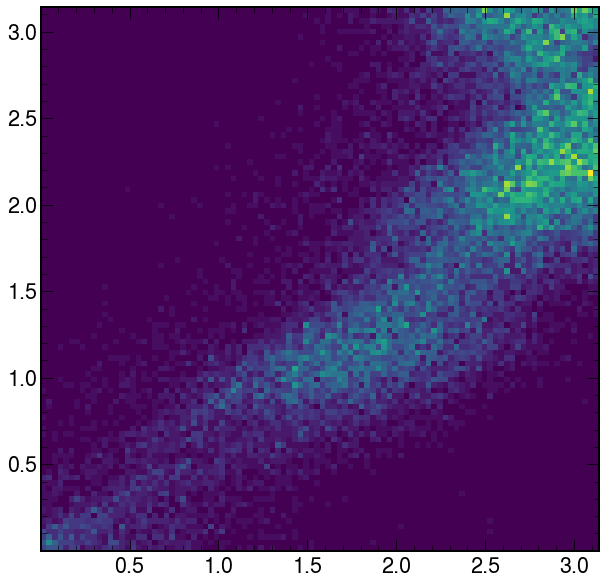

AttributeError: 'DataFrame' object has no attribute 'dphi_lab'

In [110]:
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"

df = dfs_pair['D'].query(q)
plt.hist2d(df.dphi, df.dphi_lab, bins=100)
plt.show()
df = dfs_mixed['D'].query(q)
plt.hist2d(df.dphi, df.dphi_lab, bins=100)

(array([ 922., 2515., 3479., 3813., 3701., 3524., 3042., 2609., 1985.,
        1375.]),
 array([ 5.37601473,  6.76360247,  8.15119021,  9.53877796, 10.9263657 ,
        12.31395344, 13.70154118, 15.08912892, 16.47671666, 17.8643044 ,
        19.25189214]),
 <BarContainer object of 10 artists>)

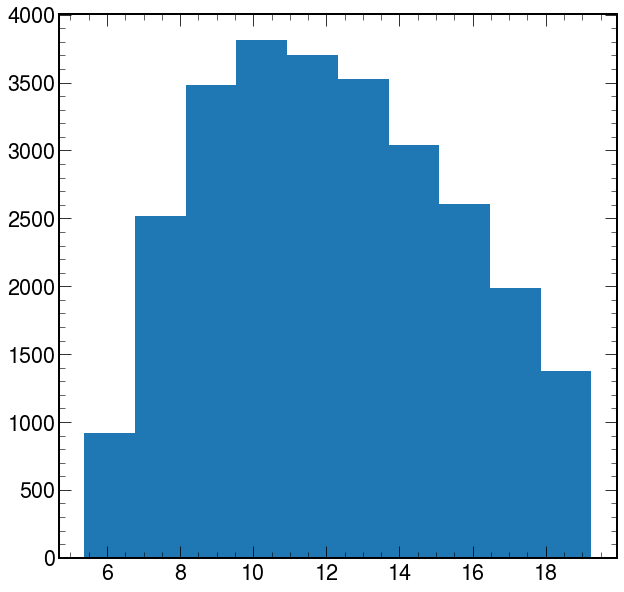

In [109]:
ep=5.014-df.nu
eth=2*np.arcsin(np.sqrt(df.Q2/(4*5.014*(ep))))
qth=np.arctan2(ep*np.sin(eth),df.nu)
plt.hist(qth*180/np.pi)

In [114]:
print("data=np.array(",list(all_data['all'][0]['D'].C),")")
print("ddata_stat=np.array(",list(all_data['all'][0]['D'].eval('dCstat')),")")
print("ddata_tot=np.array(",list(all_data['all'][0]['D'].eval('sqrt(dCstat**2+dCsyst**2)')),")")


data=np.array( [0.044563246191524825, 0.052730785430840685, 0.06804379490784453, 0.10172473281959185, 0.15529080262729392, 0.21319294425143565, 0.3017537506329588, 0.3359394878736724] )
ddata_stat=np.array( [0.001740054048562332, 0.0018440544513684965, 0.0020266594444374574, 0.0023235034970536437, 0.0027520821150895927, 0.0031630350719495932, 0.00363243168323586, 0.0037155414319713165] )
ddata_tot=np.array( [0.004774649823907977, 0.0038889803187700583, 0.0038644743661682738, 0.004805289759685645, 0.006441035421788142, 0.007923848866986084, 0.011184432513663205, 0.01693147546271249] )


(array([2.74454e+05, 2.40127e+05, 1.22604e+05, 2.54960e+04, 4.71400e+03,
        4.70000e+02, 5.60000e+01, 6.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([10.00000572, 18.5159399 , 27.03187408, 35.54780827, 44.06374245,
        52.57967663, 61.09561081, 69.61154499, 78.12747917, 86.64341335,
        95.15934753]),
 <BarContainer object of 10 artists>)

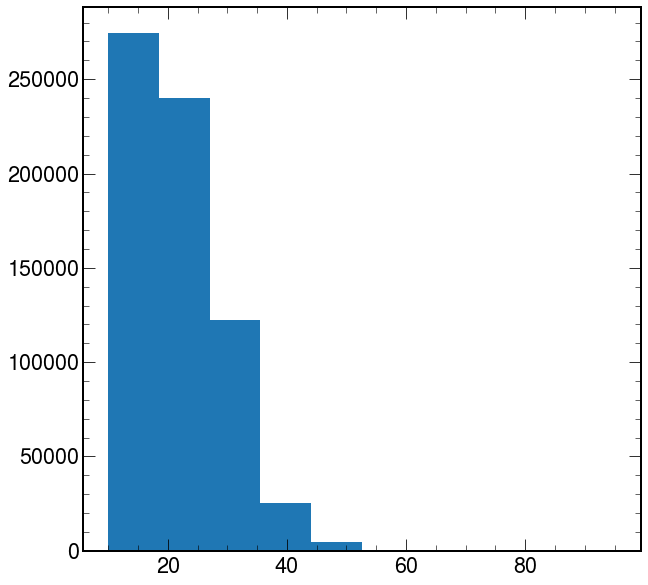

In [42]:
plt.hist(dfs_trigger['D'].h1_th)

(array([1.0500e+02, 5.3000e+02, 1.4600e+03, 2.8290e+03, 4.2260e+03,
        5.8290e+03, 7.7280e+03, 9.5190e+03, 1.1327e+04, 1.3024e+04,
        1.3887e+04, 1.5386e+04, 1.6527e+04, 1.7899e+04, 1.8660e+04,
        1.9852e+04, 2.0664e+04, 2.1301e+04, 2.2040e+04, 2.2229e+04,
        2.2638e+04, 2.2582e+04, 2.2803e+04, 2.2877e+04, 2.2685e+04,
        2.2341e+04, 2.1437e+04, 2.0451e+04, 1.9946e+04, 1.8849e+04,
        1.8345e+04, 1.7357e+04, 1.6982e+04, 1.6204e+04, 1.5405e+04,
        1.4690e+04, 1.3919e+04, 1.3155e+04, 1.2481e+04, 1.1761e+04,
        1.1354e+04, 6.5680e+03, 7.7900e+02, 1.0300e+03, 1.2410e+03,
        1.4970e+03, 1.6960e+03, 1.8340e+03, 1.9980e+03, 1.9790e+03,
        2.0830e+03, 2.0410e+03, 1.9560e+03, 1.9940e+03, 1.8330e+03,
        1.7510e+03, 1.6380e+03, 1.4880e+03, 1.4580e+03, 1.3710e+03,
        1.2580e+03, 1.0750e+03, 9.7900e+02, 8.4300e+02, 7.5600e+02,
        6.8100e+02, 5.6600e+02, 4.7000e+02, 4.1200e+02, 3.0900e+02,
        2.8900e+02, 2.0100e+02, 1.7600e+02, 1.25

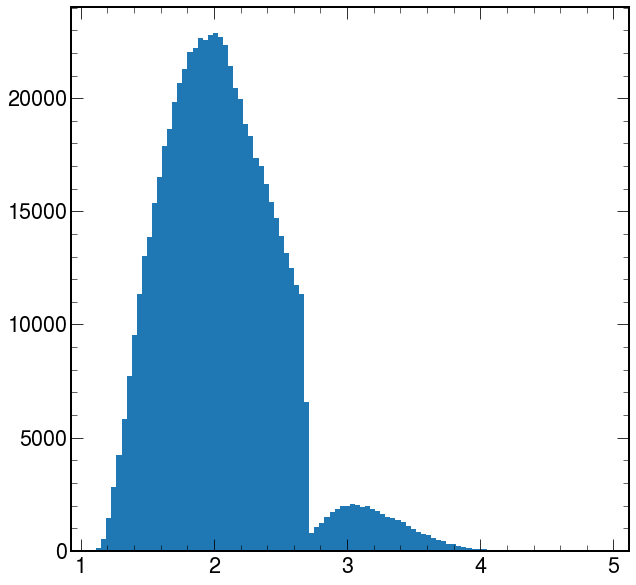

In [45]:
plt.hist(dfs_trigger['D'].h1_p, bins=100)